# Computing features to train a MLP
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to computing the histogram of gradients from the images in the `mnist` dataset (LeCun et al. 1998)

## Loading the packages

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from skimage.feature import hog
from skimage import data, color, exposure

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam


from tensorflow.keras.backend import clear_session
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Load the `mnist` dataset and normalize in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


### An example of how to compute the histogram of gradients
Let's compute the HOG for one image in the test dataset

In [ ]:
#testing with different orientation and p_cell
n_orientations =4,8,12,16
pix_p_cell = 4,7
hog_sizes = []
for n_o in n_orientations:
    for p_c in pix_p_cell:
        hog_sizes.append( int(height * width * n_o / (p_c * p_c)))
hog_sizes

X_train done
X_test done
X_train done
X_test done
X_train done
X_test done
X_train done
X_test done
X_train done
X_test done
X_train done
X_test done
X_train done
X_test done
X_train done
X_test done


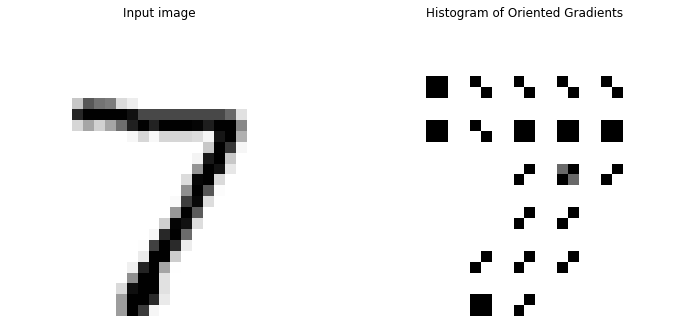

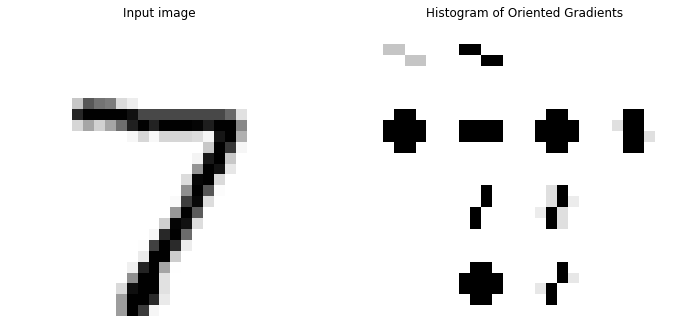

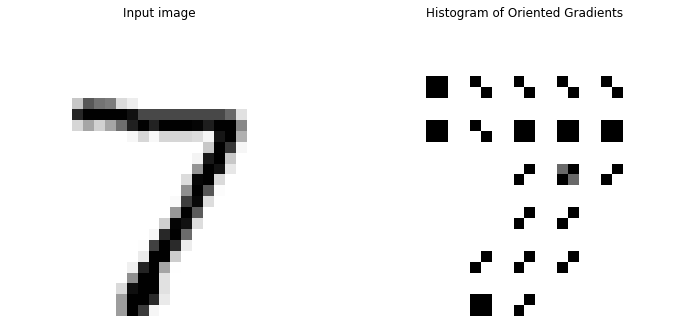

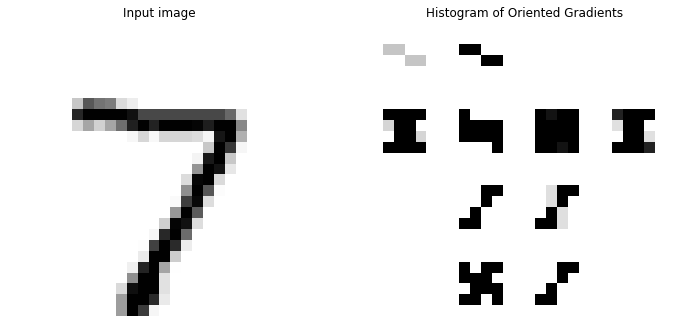

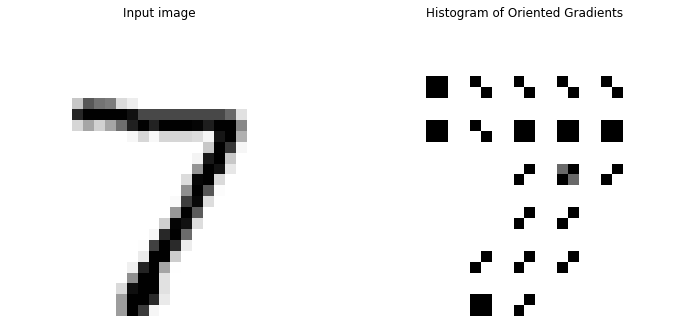

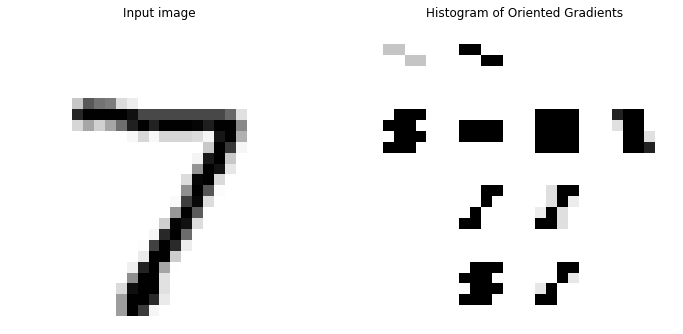

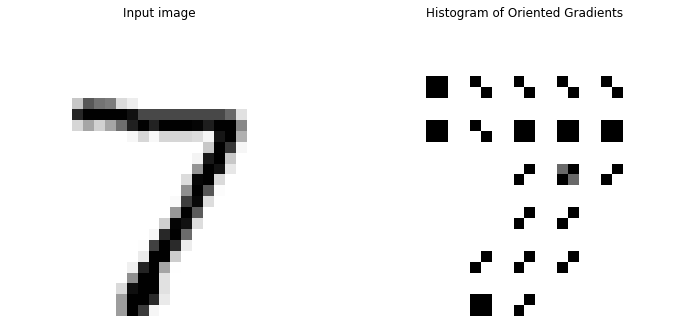

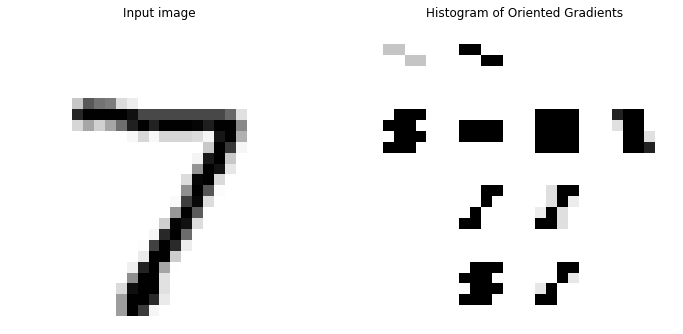

In [4]:
#testing with different orientation and p_cell

n_orientations =4,8,12,16
pix_p_cell = 4,7
for n_o in n_orientations:
    for p_c in pix_p_cell:
        hog_size= int(height * width * n_o / (p_c * p_c))
        fd, hog_image = hog(X_test[0,:,:,0], orientations=n_o, pixels_per_cell=(p_c, p_c), cells_per_block=(1, 1), visualize=True)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
        fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
        ax1.axis('off')
        ax1.imshow(X_test[0,:,:,0], cmap=pl.get_cmap('Greys'), interpolation='nearest')
        ax1.set_title('Input image')
        ax1.set_adjustable('box')
        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=pl.get_cmap('Greys'), interpolation='nearest')
        ax2.set_title('Histogram of Oriented Gradients')
        ax1.set_adjustable('box')
        X_train_hog = np.zeros((X_train.shape[0],hog_size))
        X_test_hog = np.zeros((X_test.shape[0], hog_size))
        for i in np.arange(X_train_hog.shape[0]):
            X_train_hog[i,:] = hog(X_train[i,:,:,0], orientations=n_o, pixels_per_cell=(p_c, p_c), cells_per_block=(1, 1), visualize=False)
        print('X_train done')
        for i in np.arange(X_test_hog.shape[0]):
            X_test_hog[i,:] = hog(X_test[i,:,:,0], orientations=n_o, pixels_per_cell=(p_c, p_c), cells_per_block=(1, 1), visualize=False)
        print('X_test done')

In [83]:
''' original code
fd, hog_image = hog(X_test[0,:,:,0], orientations=n_orientations, pixels_per_cell=(pix_p_cell, pix_p_cell), cells_per_block=(1, 1), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
'''

' original code\nfd, hog_image = hog(X_test[0,:,:,0], orientations=n_orientations, pixels_per_cell=(pix_p_cell, pix_p_cell), cells_per_block=(1, 1), visualize=True)\nhog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))\n'

Show the image and the corresponding gradients

In [84]:
'''fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(X_test[0,:,:,0], cmap=pl.get_cmap('Greys'), interpolation='nearest')
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=pl.get_cmap('Greys'), interpolation='nearest')
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box')'''

"fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)\nax1.axis('off')\nax1.imshow(X_test[0,:,:,0], cmap=pl.get_cmap('Greys'), interpolation='nearest')\nax1.set_title('Input image')\nax1.set_adjustable('box')\n\nax2.axis('off')\nax2.imshow(hog_image_rescaled, cmap=pl.get_cmap('Greys'), interpolation='nearest')\nax2.set_title('Histogram of Oriented Gradients')\nax1.set_adjustable('box')"

Compute the HOGs for the train and test datasets

> Indented block



In [85]:
'''X_train_hog = np.zeros((X_train.shape[0], hog_size))
X_test_hog = np.zeros((X_test.shape[0], hog_size))

for i in np.arange(X_train_hog.shape[0]):
    X_train_hog[i,:] = hog(X_train[i,:,:,0], orientations=n_orientations, pixels_per_cell=(pix_p_cell, pix_p_cell), cells_per_block=(1, 1), visualize=False)
print('X_train done')

for i in np.arange(X_test_hog.shape[0]):
    X_test_hog[i,:] = hog(X_test[i,:,:,0], orientations=n_orientations, pixels_per_cell=(pix_p_cell, pix_p_cell), cells_per_block=(1, 1), visualize=False)
print('X_test done')'''

"X_train_hog = np.zeros((X_train.shape[0], hog_size))\nX_test_hog = np.zeros((X_test.shape[0], hog_size))\n\nfor i in np.arange(X_train_hog.shape[0]):\n    X_train_hog[i,:] = hog(X_train[i,:,:,0], orientations=n_orientations, pixels_per_cell=(pix_p_cell, pix_p_cell), cells_per_block=(1, 1), visualize=False)\nprint('X_train done')\n\nfor i in np.arange(X_test_hog.shape[0]):\n    X_test_hog[i,:] = hog(X_test[i,:,:,0], orientations=n_orientations, pixels_per_cell=(pix_p_cell, pix_p_cell), cells_per_block=(1, 1), visualize=False)\nprint('X_test done')"

Create the MLP

In [5]:
def plot_graph(history, optimName, batch_size, n_epoch, n_neurons, drop, testScore, testAccuracy,hogSize):
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.suptitle(optimName+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)))
    pl.legend()
    pl.title('Test score:' + str(round(testScore,2)) + ', Test accuracy: '  + str(round(testAccuracy,2))+ ', hog size: '  + str(hogSize))
    pl.grid()
    pl.savefig('../outPutHOG/' + optimName+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+' Nb_neurons'+str(n_neurons)+'_Dropout_'+ ('None' if drop < 0 else str(drop))  + '.png', dpi=500)

In [6]:
def test_hypers(neurons, drops, batch_sizes, optims, optimNames, n_epoch):
    n_orientations =4,8,12,16
    pix_p_cell = 4,7
    for n_o in n_orientations:
        for p_c in pix_p_cell:
            hog_size= int(height * width * n_o / (p_c * p_c))
            fd, hog_image = hog(X_test[0,:,:,0], orientations=n_o, pixels_per_cell=(p_c, p_c), cells_per_block=(1, 1), visualize=True)
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
            fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
            ax1.axis('off')
            ax1.imshow(X_test[0,:,:,0], cmap=pl.get_cmap('Greys'), interpolation='nearest')
            ax1.set_title('Input image')
            ax1.set_adjustable('box')
            ax2.axis('off')
            ax2.imshow(hog_image_rescaled, cmap=pl.get_cmap('Greys'), interpolation='nearest')
            ax2.set_title('Histogram of Oriented Gradients')
            ax1.set_adjustable('box')
            X_train_hog = np.zeros((X_train.shape[0],hog_size))
            X_test_hog = np.zeros((X_test.shape[0], hog_size))
            for i in np.arange(X_train_hog.shape[0]):
                X_train_hog[i,:] = hog(X_train[i,:,:,0], orientations=n_o, pixels_per_cell=(p_c, p_c), cells_per_block=(1, 1), visualize=False)
            print('X_train done')
            for i in np.arange(X_test_hog.shape[0]):
                X_test_hog[i,:] = hog(X_test[i,:,:,0], orientations=n_o, pixels_per_cell=(p_c, p_c), cells_per_block=(1, 1), visualize=False)
            print('X_test done')
            for n_neurons in neurons:
                for drop in drops:
                    for b_size in batch_sizes:
                        for i_o, optim in enumerate(optims):
                            for e in n_epoch:
                                clear_session()
                                model = Sequential()
                                model.add(Dense(n_neurons, input_shape=(hog_size,), activation='relu'))
                                if drop > 0:
                                    model.add(Dropout(drop))
                                    model.add(Dense(n_classes, activation='softmax'))
                                    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                                    history = model.fit(X_train_hog, Y_train,
                                                           batch_size=b_size, epochs=e,
                                                           verbose=1, validation_data=(X_test_hog, Y_test))
                                    score = model.evaluate(X_test_hog, Y_test, verbose=0)
                                    plot_graph(history, optimNames[i_o], b_size, e, n_neurons, drop, score[0], score[1],hog_size)
                                    print('Test score:', score[0])
                                    print('Test accuracy:', score[1])


X_train done
X_test done
Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.3527 - accuracy: 0.9014 - val_loss: 0.1319 - val_accuracy: 0.9609
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1621 - accuracy: 0.9485 - val_loss: 0.1091 - val_accuracy: 0.9653
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1387 - accuracy: 0.9555 - val_loss: 0.0978 - val_accuracy: 0.9682
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1258 - accuracy: 0.9598 - val_loss: 0.0963 - val_accuracy: 0.9690
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1168 - accuracy: 0.9636 - val_loss: 0.0905 - val_accuracy: 0.9704
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1105 - accuracy: 0.9649 - val_loss: 0.0906 - val_accuracy: 0.9707
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1068 - accuracy: 0.9669 - val_loss: 0.0853 - va

Epoch 17/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0819 - accuracy: 0.9743 - val_loss: 0.0791 - val_accuracy: 0.9759
Epoch 18/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0795 - accuracy: 0.9747 - val_loss: 0.0804 - val_accuracy: 0.9754
Epoch 19/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0761 - accuracy: 0.9759 - val_loss: 0.0821 - val_accuracy: 0.9745
Epoch 20/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0773 - accuracy: 0.9756 - val_loss: 0.0802 - val_accuracy: 0.9758
Test score: 0.08024618774652481
Test accuracy: 0.9757999777793884
Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.5947 - accuracy: 0.8450 - val_loss: 0.1770 - val_accuracy: 0.9498
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2064 - accuracy: 0.9377 - val_loss: 0.1295 - val_accuracy: 0.9613
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.16

Epoch 13/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1403 - accuracy: 0.9604 - val_loss: 0.1011 - val_accuracy: 0.9716
Epoch 14/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1420 - accuracy: 0.9616 - val_loss: 0.1025 - val_accuracy: 0.9719
Epoch 15/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1399 - accuracy: 0.9615 - val_loss: 0.1089 - val_accuracy: 0.9709
Epoch 16/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1362 - accuracy: 0.9619 - val_loss: 0.1051 - val_accuracy: 0.9712
Epoch 17/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1373 - accuracy: 0.9623 - val_loss: 0.1046 - val_accuracy: 0.9718
Epoch 18/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1443 - accuracy: 0.9613 - val_loss: 0.1059 - val_accuracy: 0.9735
Epoch 19/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1400 - accuracy: 0.9621 - val_loss: 0.1053 - val_accuracy: 0.9721

Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1461 - accuracy: 0.9538 - val_loss: 0.0961 - val_accuracy: 0.9691
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1402 - accuracy: 0.9560 - val_loss: 0.0936 - val_accuracy: 0.9694
Epoch 11/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1378 - accuracy: 0.9571 - val_loss: 0.0920 - val_accuracy: 0.9711
Epoch 12/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1365 - accuracy: 0.9579 - val_loss: 0.0908 - val_accuracy: 0.9716
Epoch 13/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1319 - accuracy: 0.9585 - val_loss: 0.0904 - val_accuracy: 0.9711
Epoch 14/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1272 - accuracy: 0.9603 - val_loss: 0.0909 - val_accuracy: 0.9722
Epoch 15/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1266 - accuracy: 0.9607 - val_loss: 0.0887 - val_accuracy: 0.9711


Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0923 - accuracy: 0.9703 - val_loss: 0.0821 - val_accuracy: 0.9724
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0851 - accuracy: 0.9724 - val_loss: 0.0772 - val_accuracy: 0.9751
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0767 - accuracy: 0.9756 - val_loss: 0.0771 - val_accuracy: 0.9755
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0707 - accuracy: 0.9770 - val_loss: 0.0727 - val_accuracy: 0.9766
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0675 - accuracy: 0.9786 - val_loss: 0.0731 - val_accuracy: 0.9763
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0617 - accuracy: 0.9797 - val_loss: 0.0735 - val_accuracy: 0.9781
Epoch 11/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0723 - val_accuracy: 0.9777
Epoc

Test score: 0.08093812316656113
Test accuracy: 0.9768000245094299
Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2866 - accuracy: 0.9164 - val_loss: 0.1238 - val_accuracy: 0.9606
Epoch 2/20
938/938 [==============================] - 5s 6ms/step - loss: 0.1486 - accuracy: 0.9518 - val_loss: 0.1004 - val_accuracy: 0.9685
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.1276 - accuracy: 0.9593 - val_loss: 0.0934 - val_accuracy: 0.9702
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1179 - accuracy: 0.9624 - val_loss: 0.0910 - val_accuracy: 0.9713
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1079 - accuracy: 0.9664 - val_loss: 0.0856 - val_accuracy: 0.9744
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1028 - accuracy: 0.9685 - val_loss: 0.0830 - val_accuracy: 0.9739
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0985 -

469/469 [==============================] - 5s 8ms/step - loss: 0.2582 - accuracy: 0.9288 - val_loss: 0.1205 - val_accuracy: 0.9621
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1298 - accuracy: 0.9581 - val_loss: 0.0993 - val_accuracy: 0.9667
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1080 - accuracy: 0.9643 - val_loss: 0.0896 - val_accuracy: 0.9706
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0935 - accuracy: 0.9691 - val_loss: 0.0823 - val_accuracy: 0.9744
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0822 - accuracy: 0.9739 - val_loss: 0.0765 - val_accuracy: 0.9747
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0727 - accuracy: 0.9768 - val_loss: 0.0705 - val_accuracy: 0.9768
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0649 - accuracy: 0.9789 - val_loss: 0.0725 - val_accuracy: 0.9751
Epoch 8/10
469/46

Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9811 - val_loss: 0.0723 - val_accuracy: 0.9780
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0725 - val_accuracy: 0.9796
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.0709 - val_accuracy: 0.9794
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0720 - val_accuracy: 0.9800
Epoch 17/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0715 - val_accuracy: 0.9804
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0715 - val_accuracy: 0.9798
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0735 - val_accuracy: 0.9797

Epoch 4/20
235/235 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8924 - val_loss: 0.2606 - val_accuracy: 0.9151
Epoch 5/20
235/235 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8988 - val_loss: 0.2475 - val_accuracy: 0.9182
Epoch 6/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.9038 - val_loss: 0.2392 - val_accuracy: 0.9234
Epoch 7/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.9058 - val_loss: 0.2318 - val_accuracy: 0.9251
Epoch 8/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.9111 - val_loss: 0.2255 - val_accuracy: 0.9270
Epoch 9/20
235/235 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9113 - val_loss: 0.2204 - val_accuracy: 0.9287
Epoch 10/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2617 - accuracy: 0.9166 - val_loss: 0.2155 - val_accuracy: 0.9318
Epoch

Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2048 - accuracy: 0.9330 - val_loss: 0.1844 - val_accuracy: 0.9403
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1970 - accuracy: 0.9365 - val_loss: 0.1818 - val_accuracy: 0.9421
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1898 - accuracy: 0.9384 - val_loss: 0.1769 - val_accuracy: 0.9409
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1859 - accuracy: 0.9404 - val_loss: 0.1767 - val_accuracy: 0.9438
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1808 - accuracy: 0.9419 - val_loss: 0.1698 - val_accuracy: 0.9426
Test score: 0.16977699100971222
Test accuracy: 0.9426000118255615
Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4912 - accuracy: 0.8568 - val_loss: 0.2616 - val_accuracy: 0.9171
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2889 

Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8930 - val_loss: 0.2741 - val_accuracy: 0.9112
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2938 - accuracy: 0.9046 - val_loss: 0.2497 - val_accuracy: 0.9215
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2709 - accuracy: 0.9129 - val_loss: 0.2285 - val_accuracy: 0.9255
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2546 - accuracy: 0.9172 - val_loss: 0.2209 - val_accuracy: 0.9275
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2421 - accuracy: 0.9211 - val_loss: 0.2096 - val_accuracy: 0.9320
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.9244 - val_loss: 0.2057 - val_accuracy: 0.9310
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.9263 - val_loss: 0.2012 - val_accuracy: 0.9335
Epoch 

Epoch 14/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2116 - accuracy: 0.9316 - val_loss: 0.1830 - val_accuracy: 0.9400
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.9337 - val_loss: 0.1816 - val_accuracy: 0.9409
Epoch 16/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2045 - accuracy: 0.9341 - val_loss: 0.1777 - val_accuracy: 0.9424
Epoch 17/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9347 - val_loss: 0.1776 - val_accuracy: 0.9416
Epoch 18/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1966 - accuracy: 0.9363 - val_loss: 0.1744 - val_accuracy: 0.9429
Epoch 19/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1955 - accuracy: 0.9373 - val_loss: 0.1729 - val_accuracy: 0.9430
Epoch 20/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1922 - accuracy: 0.9381 - val_loss: 0.1688 - val_accuracy: 0.9451

Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9449 - val_loss: 0.1651 - val_accuracy: 0.9445
Epoch 11/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9459 - val_loss: 0.1636 - val_accuracy: 0.9443
Epoch 12/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1582 - accuracy: 0.9475 - val_loss: 0.1646 - val_accuracy: 0.9452
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1547 - accuracy: 0.9488 - val_loss: 0.1610 - val_accuracy: 0.9458
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.9509 - val_loss: 0.1580 - val_accuracy: 0.9471
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1472 - accuracy: 0.9515 - val_loss: 0.1586 - val_accuracy: 0.9484
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1439 - accuracy: 0.9529 - val_loss: 0.1575 - val_accuracy: 0.9460

235/235 [==============================] - 1s 4ms/step - loss: 0.6679 - accuracy: 0.8167 - val_loss: 0.3188 - val_accuracy: 0.9046
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8912 - val_loss: 0.2649 - val_accuracy: 0.9128
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2938 - accuracy: 0.9036 - val_loss: 0.2498 - val_accuracy: 0.9162
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2716 - accuracy: 0.9118 - val_loss: 0.2296 - val_accuracy: 0.9267
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.9173 - val_loss: 0.2136 - val_accuracy: 0.9307
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.9222 - val_loss: 0.2064 - val_accuracy: 0.9325
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2311 - accuracy: 0.9242 - val_loss: 0.1986 - val_accuracy: 0.9371
Epoch 8/20
235/23

469/469 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9777 - val_loss: 0.0689 - val_accuracy: 0.9780
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0662 - val_accuracy: 0.9792
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0628 - val_accuracy: 0.9795
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9813 - val_loss: 0.0639 - val_accuracy: 0.9807
Test score: 0.0639457181096077
Test accuracy: 0.9807000160217285
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3533 - accuracy: 0.9095 - val_loss: 0.1029 - val_accuracy: 0.9704
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9595 - val_loss: 0.0836 - val_accuracy: 0.9751
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 

Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1269 - accuracy: 0.9627 - val_loss: 0.0781 - val_accuracy: 0.9753
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1160 - accuracy: 0.9657 - val_loss: 0.0778 - val_accuracy: 0.9754
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1077 - accuracy: 0.9675 - val_loss: 0.0762 - val_accuracy: 0.9772
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1041 - accuracy: 0.9692 - val_loss: 0.0759 - val_accuracy: 0.9779
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1018 - accuracy: 0.9705 - val_loss: 0.0785 - val_accuracy: 0.9779
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0973 - accuracy: 0.9715 - val_loss: 0.0832 - val_accuracy: 0.9775
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0964 - accuracy: 0.9725 - val_loss: 0.0780 - val_accuracy: 0.9788
Epoch 

Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.0753 - val_accuracy: 0.9839
Epoch 16/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0768 - val_accuracy: 0.9838
Epoch 17/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0806 - val_accuracy: 0.9818
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0776 - val_accuracy: 0.9826
Epoch 19/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0800 - val_accuracy: 0.9822
Epoch 20/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0831 - val_accuracy: 0.9824
Test score: 0.08312439173460007
Test accuracy: 0.9824000000953674
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.

Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.0584 - val_accuracy: 0.9817
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0560 - val_accuracy: 0.9835
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0548 - val_accuracy: 0.9829
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0259 - accuracy: 0.9925 - val_loss: 0.0557 - val_accuracy: 0.9830
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0571 - val_accuracy: 0.9829
Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0571 - val_accuracy: 0.9824
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0584 - val_accuracy: 0.9832

Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0598 - val_accuracy: 0.9817
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9828 - val_loss: 0.0603 - val_accuracy: 0.9813
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9830 - val_loss: 0.0598 - val_accuracy: 0.9816
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0595 - val_accuracy: 0.9815
Epoch 11/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0612 - val_accuracy: 0.9820
Epoch 12/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0629 - val_accuracy: 0.9827
Epoch 13/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0608 - val_accuracy: 0.9831
Ep

235/235 [==============================] - 1s 5ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0566 - val_accuracy: 0.9815
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0567 - val_accuracy: 0.9820
Test score: 0.05665192753076553
Test accuracy: 0.9819999933242798
Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.2473 - accuracy: 0.9376 - val_loss: 0.0885 - val_accuracy: 0.9722
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0975 - accuracy: 0.9693 - val_loss: 0.0740 - val_accuracy: 0.9755
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0775 - accuracy: 0.9748 - val_loss: 0.0800 - val_accuracy: 0.9741
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0664 - accuracy:

Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0691 - accuracy: 0.9777 - val_loss: 0.0643 - val_accuracy: 0.9797
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 0.0602 - val_accuracy: 0.9819
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0595 - val_accuracy: 0.9804
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0589 - val_accuracy: 0.9813
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0580 - val_accuracy: 0.9825
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0605 - val_accuracy: 0.9826
Test 

469/469 [==============================] - 1s 2ms/step - loss: 0.1312 - accuracy: 0.9569 - val_loss: 0.1114 - val_accuracy: 0.9627
Epoch 16/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.9580 - val_loss: 0.1102 - val_accuracy: 0.9647
Epoch 17/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1270 - accuracy: 0.9596 - val_loss: 0.1137 - val_accuracy: 0.9640
Epoch 18/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1250 - accuracy: 0.9599 - val_loss: 0.1083 - val_accuracy: 0.9653
Epoch 19/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9603 - val_loss: 0.1071 - val_accuracy: 0.9654
Epoch 20/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9611 - val_loss: 0.1086 - val_accuracy: 0.9652
Test score: 0.10855938494205475
Test accuracy: 0.9652000069618225
Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.8164 - accur

Epoch 11/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1925 - accuracy: 0.9417 - val_loss: 0.1359 - val_accuracy: 0.9575
Epoch 12/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1900 - accuracy: 0.9432 - val_loss: 0.1323 - val_accuracy: 0.9578
Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1905 - accuracy: 0.9446 - val_loss: 0.1342 - val_accuracy: 0.9588
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1855 - accuracy: 0.9438 - val_loss: 0.1339 - val_accuracy: 0.9585
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1896 - accuracy: 0.9453 - val_loss: 0.1331 - val_accuracy: 0.9581
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1863 - accuracy: 0.9465 - val_loss: 0.1343 - val_accuracy: 0.9593
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1869 - accuracy: 0.9460 - val_loss: 0.1349 - val_accuracy: 0.9590

Epoch 7/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2202 - accuracy: 0.9307 - val_loss: 0.1472 - val_accuracy: 0.9510
Epoch 8/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9336 - val_loss: 0.1430 - val_accuracy: 0.9534
Epoch 9/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9347 - val_loss: 0.1383 - val_accuracy: 0.9549
Epoch 10/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1999 - accuracy: 0.9369 - val_loss: 0.1376 - val_accuracy: 0.9544
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1954 - accuracy: 0.9386 - val_loss: 0.1345 - val_accuracy: 0.9556
Epoch 12/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1942 - accuracy: 0.9396 - val_loss: 0.1324 - val_accuracy: 0.9560
Epoch 13/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1885 - accuracy: 0.9406 - val_loss: 0.1298 - val_accuracy: 0.9573
Ep

Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9438 - val_loss: 0.1440 - val_accuracy: 0.9519
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9489 - val_loss: 0.1289 - val_accuracy: 0.9568
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.9532 - val_loss: 0.1224 - val_accuracy: 0.9597
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9564 - val_loss: 0.1175 - val_accuracy: 0.9612
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1225 - accuracy: 0.9603 - val_loss: 0.1080 - val_accuracy: 0.9639
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9620 - val_loss: 0.1035 - val_accuracy: 0.9665
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9642 - val_loss: 0.1023 - val_accuracy: 0.9660
Epoch 

Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1755 - accuracy: 0.9427 - val_loss: 0.1371 - val_accuracy: 0.9547
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1648 - accuracy: 0.9467 - val_loss: 0.1288 - val_accuracy: 0.9571
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1574 - accuracy: 0.9497 - val_loss: 0.1247 - val_accuracy: 0.9588
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1498 - accuracy: 0.9511 - val_loss: 0.1190 - val_accuracy: 0.9595
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1424 - accuracy: 0.9532 - val_loss: 0.1163 - val_accuracy: 0.9613
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1366 - accuracy: 0.9561 - val_loss: 0.1129 - val_accuracy: 0.9621
Test score: 0.11289365589618683
Test accuracy: 0.9621000289916992
Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6071 

469/469 [==============================] - 2s 3ms/step - loss: 0.3688 - accuracy: 0.9014 - val_loss: 0.1696 - val_accuracy: 0.9448
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1840 - accuracy: 0.9399 - val_loss: 0.1496 - val_accuracy: 0.9511
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1592 - accuracy: 0.9473 - val_loss: 0.1381 - val_accuracy: 0.9557
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1433 - accuracy: 0.9520 - val_loss: 0.1223 - val_accuracy: 0.9590
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1281 - accuracy: 0.9574 - val_loss: 0.1155 - val_accuracy: 0.9623
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9608 - val_loss: 0.1135 - val_accuracy: 0.9633
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1097 - accuracy: 0.9641 - val_loss: 0.1026 - val_accuracy: 0.9665
Epoch 8/10
469/46

Epoch 13/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0983 - accuracy: 0.9681 - val_loss: 0.0928 - val_accuracy: 0.9684
Epoch 14/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0946 - accuracy: 0.9691 - val_loss: 0.0983 - val_accuracy: 0.9675
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0926 - accuracy: 0.9715 - val_loss: 0.0934 - val_accuracy: 0.9703
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.9718 - val_loss: 0.0957 - val_accuracy: 0.9696
Epoch 17/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0871 - accuracy: 0.9726 - val_loss: 0.0948 - val_accuracy: 0.9699
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9728 - val_loss: 0.0925 - val_accuracy: 0.9711
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0913 - val_accuracy: 0.9716

Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9728 - val_loss: 0.0717 - val_accuracy: 0.9766
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9754 - val_loss: 0.0676 - val_accuracy: 0.9779
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9779 - val_loss: 0.0672 - val_accuracy: 0.9787
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0648 - val_accuracy: 0.9795
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0626 - val_accuracy: 0.9801
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0634 - val_accuracy: 0.9784
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0645 - val_accuracy: 0.9789
Epoch

Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.0657 - val_accuracy: 0.9811
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0670 - val_accuracy: 0.9805
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.0671 - val_accuracy: 0.9811
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.0691 - val_accuracy: 0.9810
Test score: 0.06905101984739304
Test accuracy: 0.9810000061988831
Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 0.1758 - accuracy: 0.9508 - val_loss: 0.0766 - val_accuracy: 0.9762
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0799 

938/938 [==============================] - 3s 3ms/step - loss: 0.0313 - accuracy: 0.9918 - val_loss: 0.0828 - val_accuracy: 0.9815
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0297 - accuracy: 0.9921 - val_loss: 0.0856 - val_accuracy: 0.9805
Epoch 19/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0283 - accuracy: 0.9923 - val_loss: 0.0859 - val_accuracy: 0.9818
Epoch 20/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0269 - accuracy: 0.9927 - val_loss: 0.0907 - val_accuracy: 0.9809
Test score: 0.09068775922060013
Test accuracy: 0.98089998960495
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2487 - accuracy: 0.9321 - val_loss: 0.0848 - val_accuracy: 0.9731
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9688 - val_loss: 0.0703 - val_accuracy: 0.9757
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0813 - accuracy:

Epoch 13/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 14/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0605 - val_accuracy: 0.9822
Epoch 15/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0578 - val_accuracy: 0.9821
Epoch 16/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0582 - val_accuracy: 0.9826
Epoch 17/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 0.0618 - val_accuracy: 0.9821
Epoch 18/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0582 - val_accuracy: 0.9819
Epoch 19/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0621 - val_accuracy: 0.9814

Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0677 - val_accuracy: 0.9802
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0640 - val_accuracy: 0.9812
Epoch 11/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0677 - val_accuracy: 0.9804
Epoch 12/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0670 - val_accuracy: 0.9822
Epoch 13/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0717 - val_accuracy: 0.9818
Epoch 14/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0704 - val_accuracy: 0.9826
Epoch 15/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0754 - val_accuracy: 0.9818


Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0631 - val_accuracy: 0.9811
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.0661 - val_accuracy: 0.9806
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0421 - accuracy: 0.9878 - val_loss: 0.0682 - val_accuracy: 0.9815
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0401 - accuracy: 0.9887 - val_loss: 0.0670 - val_accuracy: 0.9816
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0344 - accuracy: 0.9901 - val_loss: 0.0704 - val_accuracy: 0.9808
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0704 - val_accuracy: 0.9822
Epoch 11/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0288 - accuracy: 0.9919 - val_loss: 0.0732 - val_accuracy: 0.9812
Epoc

235/235 [==============================] - 2s 8ms/step - loss: 0.2544 - accuracy: 0.9347 - val_loss: 0.0884 - val_accuracy: 0.9714
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0985 - accuracy: 0.9686 - val_loss: 0.0736 - val_accuracy: 0.9760
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0766 - accuracy: 0.9758 - val_loss: 0.0643 - val_accuracy: 0.9797
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0640 - accuracy: 0.9798 - val_loss: 0.0613 - val_accuracy: 0.9789
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0588 - val_accuracy: 0.9807
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0575 - val_accuracy: 0.9818
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0573 - val_accuracy: 0.9811
Epoch 8/20
235/23

469/469 [==============================] - 1s 2ms/step - loss: 0.1398 - accuracy: 0.9544 - val_loss: 0.1124 - val_accuracy: 0.9628
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9574 - val_loss: 0.1068 - val_accuracy: 0.9643
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1283 - accuracy: 0.9588 - val_loss: 0.1034 - val_accuracy: 0.9654
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1233 - accuracy: 0.9605 - val_loss: 0.1010 - val_accuracy: 0.9661
Test score: 0.10101445019245148
Test accuracy: 0.9660999774932861
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5716 - accuracy: 0.8496 - val_loss: 0.1960 - val_accuracy: 0.9404
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2239 - accuracy: 0.9298 - val_loss: 0.1508 - val_accuracy: 0.9506
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1876 - accuracy:

Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2127 - accuracy: 0.9352 - val_loss: 0.1348 - val_accuracy: 0.9546
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.9394 - val_loss: 0.1284 - val_accuracy: 0.9565
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1859 - accuracy: 0.9430 - val_loss: 0.1209 - val_accuracy: 0.9597
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1778 - accuracy: 0.9462 - val_loss: 0.1185 - val_accuracy: 0.9606
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1713 - accuracy: 0.9478 - val_loss: 0.1158 - val_accuracy: 0.9609
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1725 - accuracy: 0.9479 - val_loss: 0.1168 - val_accuracy: 0.9621
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1680 - accuracy: 0.9494 - val_loss: 0.1151 - val_accuracy: 0.9615
Epoch 

Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0612 - accuracy: 0.9819 - val_loss: 0.0872 - val_accuracy: 0.9738
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0581 - accuracy: 0.9823 - val_loss: 0.0860 - val_accuracy: 0.9735
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0892 - val_accuracy: 0.9733
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0903 - val_accuracy: 0.9745
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0923 - val_accuracy: 0.9745
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0933 - val_accuracy: 0.9748
Test score: 0.093297079205513
Test accuracy: 0.9747999906539917
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.38

Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0876 - accuracy: 0.9718 - val_loss: 0.0878 - val_accuracy: 0.9702
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0825 - accuracy: 0.9739 - val_loss: 0.0912 - val_accuracy: 0.9702
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0778 - accuracy: 0.9753 - val_loss: 0.0855 - val_accuracy: 0.9712
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9763 - val_loss: 0.0837 - val_accuracy: 0.9707
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9767 - val_loss: 0.0851 - val_accuracy: 0.9710
Epoch 16/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0854 - val_accuracy: 0.9701
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0822 - val_accuracy: 0.9723

Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1207 - accuracy: 0.9610 - val_loss: 0.0983 - val_accuracy: 0.9672
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9639 - val_loss: 0.0957 - val_accuracy: 0.9673
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1098 - accuracy: 0.9648 - val_loss: 0.0950 - val_accuracy: 0.9673
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1043 - accuracy: 0.9666 - val_loss: 0.0942 - val_accuracy: 0.9686
Epoch 11/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1007 - accuracy: 0.9674 - val_loss: 0.0900 - val_accuracy: 0.9692
Epoch 12/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0944 - accuracy: 0.9701 - val_loss: 0.0883 - val_accuracy: 0.9708
Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9700 - val_loss: 0.0895 - val_accuracy: 0.9711
Ep

Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1244 - accuracy: 0.9592 - val_loss: 0.1100 - val_accuracy: 0.9629
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1081 - accuracy: 0.9651 - val_loss: 0.0954 - val_accuracy: 0.9678
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0962 - accuracy: 0.9692 - val_loss: 0.0918 - val_accuracy: 0.9703
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0875 - accuracy: 0.9720 - val_loss: 0.0950 - val_accuracy: 0.9699
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0783 - accuracy: 0.9751 - val_loss: 0.0846 - val_accuracy: 0.9722
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 0.9771 - val_loss: 0.0892 - val_accuracy: 0.9706
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.0885 - val_accuracy: 0.9729
Epoch 

Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1197 - accuracy: 0.9615 - val_loss: 0.0990 - val_accuracy: 0.9658
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1080 - accuracy: 0.9654 - val_loss: 0.0948 - val_accuracy: 0.9677
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1011 - accuracy: 0.9673 - val_loss: 0.0937 - val_accuracy: 0.9681
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0960 - accuracy: 0.9693 - val_loss: 0.0897 - val_accuracy: 0.9693
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0907 - accuracy: 0.9711 - val_loss: 0.0867 - val_accuracy: 0.9711
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0846 - accuracy: 0.9724 - val_loss: 0.0851 - val_accuracy: 0.9713
Test score: 0.08514764159917831
Test accuracy: 0.9713000059127808
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3679 

X_train done
X_test done
Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2393 - accuracy: 0.9363 - val_loss: 0.0818 - val_accuracy: 0.9742
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0974 - accuracy: 0.9696 - val_loss: 0.0719 - val_accuracy: 0.9775
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0790 - accuracy: 0.9760 - val_loss: 0.0708 - val_accuracy: 0.9768
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.0685 - val_accuracy: 0.9781
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0677 - val_accuracy: 0.9799
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0523 - accuracy: 0.9831 - val_loss: 0.0685 - va

Epoch 17/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0721 - val_accuracy: 0.9817
Epoch 18/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0735 - val_accuracy: 0.9823
Epoch 19/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0725 - val_accuracy: 0.9824
Epoch 20/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0767 - val_accuracy: 0.9814
Test score: 0.07672122120857239
Test accuracy: 0.9814000129699707
Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.9062 - val_loss: 0.1096 - val_accuracy: 0.9690
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1239 - accuracy: 0.9632 - val_loss: 0.0828 - val_accuracy: 0.9747
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.09

Epoch 13/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0712 - accuracy: 0.9810 - val_loss: 0.0814 - val_accuracy: 0.9803
Epoch 14/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0685 - accuracy: 0.9810 - val_loss: 0.0846 - val_accuracy: 0.9805
Epoch 15/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0718 - accuracy: 0.9809 - val_loss: 0.0857 - val_accuracy: 0.9792
Epoch 16/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0668 - accuracy: 0.9822 - val_loss: 0.0860 - val_accuracy: 0.9803
Epoch 17/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0698 - accuracy: 0.9819 - val_loss: 0.0910 - val_accuracy: 0.9804
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0667 - accuracy: 0.9823 - val_loss: 0.0898 - val_accuracy: 0.9809
Epoch 19/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0681 - accuracy: 0.9824 - val_loss: 0.0930 - val_accuracy: 0.9806

Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9771 - val_loss: 0.0627 - val_accuracy: 0.9801
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0639 - val_accuracy: 0.9795
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0633 - val_accuracy: 0.9806
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0612 - accuracy: 0.9815 - val_loss: 0.0631 - val_accuracy: 0.9807
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0621 - val_accuracy: 0.9817
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.0634 - val_accuracy: 0.9816


938/938 [==============================] - 3s 3ms/step - loss: 0.0366 - accuracy: 0.9898 - val_loss: 0.0722 - val_accuracy: 0.9821
Test score: 0.07224731147289276
Test accuracy: 0.9821000099182129
Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1988 - accuracy: 0.9446 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.0658 - val_accuracy: 0.9797
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0640 - val_accuracy: 0.9799
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0640 - val_accuracy: 0.9822
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0520 - accuracy: 

Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0587 - val_accuracy: 0.9819
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0582 - val_accuracy: 0.9824
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0568 - val_accuracy: 0.9829
Test score: 0.056797727942466736
Test accuracy: 0.9829000234603882
Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2929 - accuracy: 0.9281 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1055

KeyboardInterrupt: 

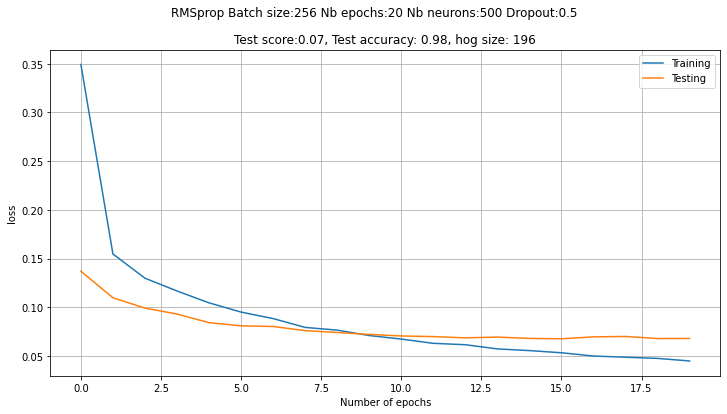

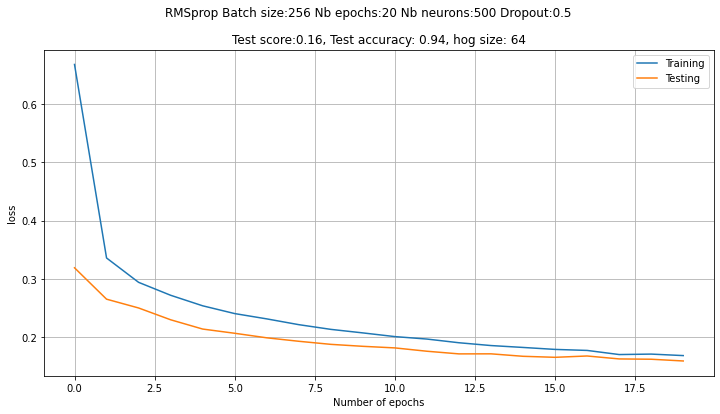

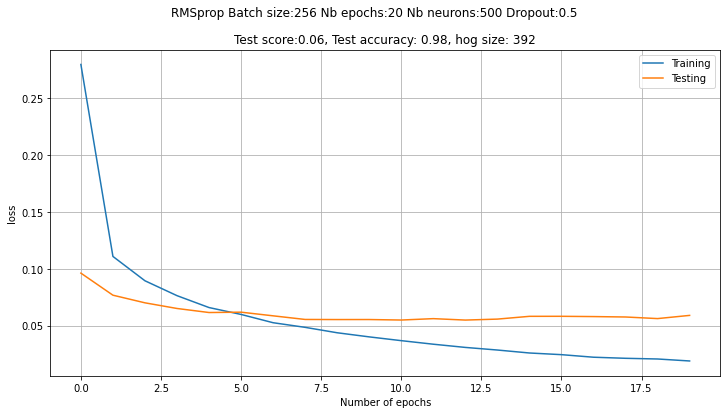

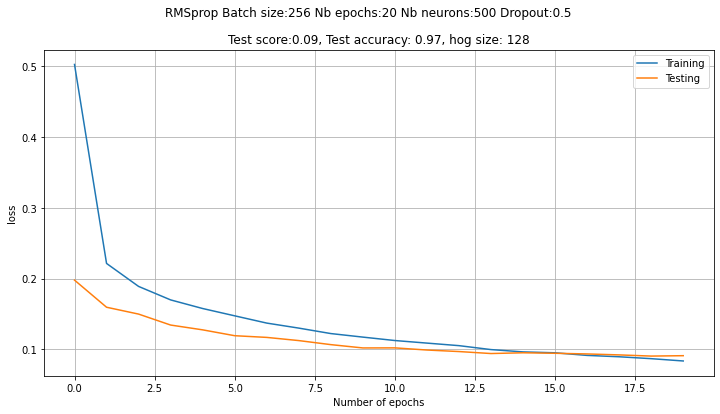

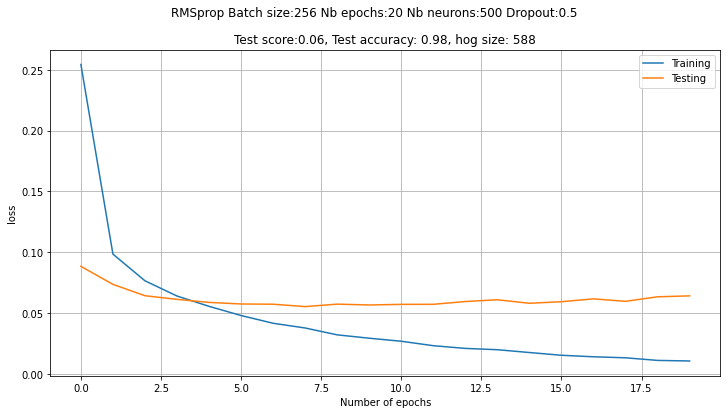

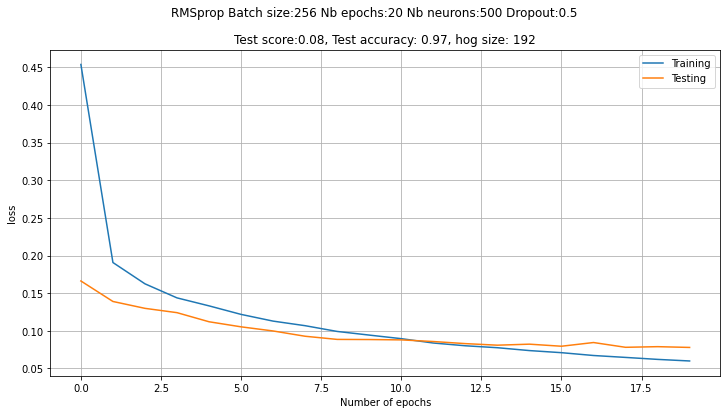

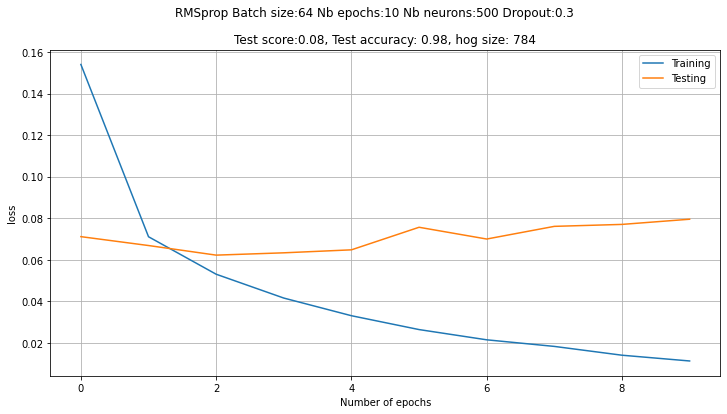

In [9]:
test_hypers([100, 300, 500], [-1, 0.3, 0.5], [64, 128, 256], [RMSprop()], ['RMSprop'], [10,20])

X_train done
X_test done
Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6182 - accuracy: 0.8376 - val_loss: 0.2031 - val_accuracy: 0.9466
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2391 - accuracy: 0.9287 - val_loss: 0.1482 - val_accuracy: 0.9566
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1956 - accuracy: 0.9397 - val_loss: 0.1304 - val_accuracy: 0.9613
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1761 - accuracy: 0.9452 - val_loss: 0.1214 - val_accuracy: 0.9628
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1645 - accuracy: 0.9484 - val_loss: 0.1137 - val_accuracy: 0.9652
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1555 - accuracy: 0.9509 - val_loss: 0.1100 - val_accuracy: 0.9654
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1458 - accuracy: 0.9539 - val_loss: 0.1060 - va

938/938 [==============================] - 2s 2ms/step - loss: 0.4199 - accuracy: 0.8900 - val_loss: 0.3141 - val_accuracy: 0.9336
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4074 - accuracy: 0.8926 - val_loss: 0.3048 - val_accuracy: 0.9348
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3977 - accuracy: 0.8925 - val_loss: 0.2964 - val_accuracy: 0.9355
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3908 - accuracy: 0.8954 - val_loss: 0.2888 - val_accuracy: 0.9360
Test score: 0.28875064849853516
Test accuracy: 0.9359999895095825
Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3787 - accuracy: 0.8935 - val_loss: 0.1358 - val_accuracy: 0.9591
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1685 - accuracy: 0.9469 - val_loss: 0.1148 - val_accuracy: 0.9641
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1432 - accurac

Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0736 - accuracy: 0.9758 - val_loss: 0.0718 - val_accuracy: 0.9757
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0727 - accuracy: 0.9762 - val_loss: 0.0719 - val_accuracy: 0.9776
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0698 - accuracy: 0.9767 - val_loss: 0.0699 - val_accuracy: 0.9776
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0653 - accuracy: 0.9785 - val_loss: 0.0694 - val_accuracy: 0.9773
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0651 - accuracy: 0.9789 - val_loss: 0.0705 - val_accuracy: 0.9761
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0645 - accuracy: 0.9783 - val_loss: 0.0708 - val_accuracy: 0.9760
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0627 - accuracy: 0.9789 - val_loss: 0.0707 - val_accuracy: 0.9762

Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.8138 - accuracy: 0.8168 - val_loss: 0.6679 - val_accuracy: 0.9035
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7587 - accuracy: 0.8259 - val_loss: 0.6182 - val_accuracy: 0.9071
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7138 - accuracy: 0.8345 - val_loss: 0.5762 - val_accuracy: 0.9118
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6776 - accuracy: 0.8408 - val_loss: 0.5408 - val_accuracy: 0.9144
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6399 - accuracy: 0.8476 - val_loss: 0.5102 - val_accuracy: 0.9167
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6126 - accuracy: 0.8522 - val_loss: 0.4839 - val_accuracy: 0.9192
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5887 - accuracy: 0.8554 - val_loss: 0.4611 - val_accuracy: 0.9210


235/235 [==============================] - 0s 2ms/step - loss: 1.0935 - accuracy: 0.7555 - val_loss: 0.9566 - val_accuracy: 0.8744
Test score: 0.9565883874893188
Test accuracy: 0.8744000196456909
Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 2.2870 - accuracy: 0.1495 - val_loss: 2.1594 - val_accuracy: 0.2698
Epoch 2/20
235/235 [==============================] - 1s 2ms/step - loss: 2.1059 - accuracy: 0.2871 - val_loss: 1.9973 - val_accuracy: 0.4766
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9591 - accuracy: 0.4158 - val_loss: 1.8487 - val_accuracy: 0.6199
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8210 - accuracy: 0.5160 - val_loss: 1.7066 - val_accuracy: 0.7003
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 1.6939 - accuracy: 0.5810 - val_loss: 1.5719 - val_accuracy: 0.7519
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 1.5692 - accuracy: 0

Epoch 6/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9628 - val_loss: 0.0894 - val_accuracy: 0.9704
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9656 - val_loss: 0.0868 - val_accuracy: 0.9717
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9672 - val_loss: 0.0851 - val_accuracy: 0.9719
Epoch 9/10
235/235 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.9684 - val_loss: 0.0836 - val_accuracy: 0.9726
Epoch 10/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9688 - val_loss: 0.0825 - val_accuracy: 0.9725
Test score: 0.08246683329343796
Test accuracy: 0.9725000262260437
Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.9158 - val_loss: 0.1202 - val_accuracy: 0.9631
Epoch 2/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1567 

938/938 [==============================] - 2s 2ms/step - loss: 0.1066 - accuracy: 0.9657 - val_loss: 0.0791 - val_accuracy: 0.9741
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1055 - accuracy: 0.9660 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1043 - accuracy: 0.9662 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1028 - accuracy: 0.9661 - val_loss: 0.0814 - val_accuracy: 0.9748
Test score: 0.0814371407032013
Test accuracy: 0.9747999906539917
Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2836 - accuracy: 0.9134 - val_loss: 0.1223 - val_accuracy: 0.9632
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1845 - accuracy: 0.9431 - val_loss: 0.1076 - val_accuracy: 0.9660
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1663 - accuracy

Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9490 - val_loss: 0.1053 - val_accuracy: 0.9666
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1613 - accuracy: 0.9495 - val_loss: 0.1044 - val_accuracy: 0.9670
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1592 - accuracy: 0.9507 - val_loss: 0.1025 - val_accuracy: 0.9680
Epoch 16/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9526 - val_loss: 0.1005 - val_accuracy: 0.9678
Epoch 17/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1519 - accuracy: 0.9527 - val_loss: 0.0998 - val_accuracy: 0.9683
Epoch 18/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9538 - val_loss: 0.0983 - val_accuracy: 0.9691
Epoch 19/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9547 - val_loss: 0.0979 - val_accuracy: 0.9684

Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9576 - val_loss: 0.0900 - val_accuracy: 0.9697
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9579 - val_loss: 0.0886 - val_accuracy: 0.9707
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1270 - accuracy: 0.9600 - val_loss: 0.0863 - val_accuracy: 0.9715
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9606 - val_loss: 0.0854 - val_accuracy: 0.9717
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9611 - val_loss: 0.0844 - val_accuracy: 0.9718
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1209 - accuracy: 0.9615 - val_loss: 0.0831 - val_accuracy: 0.9718
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9631 - val_loss: 0.0832 - val_accuracy: 0.9726


235/235 [==============================] - 1s 3ms/step - loss: 0.1381 - accuracy: 0.9575 - val_loss: 0.0906 - val_accuracy: 0.9706
Test score: 0.09057821333408356
Test accuracy: 0.9706000089645386
Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3723 - accuracy: 0.8840 - val_loss: 0.1361 - val_accuracy: 0.9582
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2001 - accuracy: 0.9387 - val_loss: 0.1196 - val_accuracy: 0.9618
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1812 - accuracy: 0.9438 - val_loss: 0.1098 - val_accuracy: 0.9646
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1680 - accuracy: 0.9485 - val_loss: 0.1039 - val_accuracy: 0.9664
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1597 - accuracy: 0.9502 - val_loss: 0.1001 - val_accuracy: 0.9685
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1536 - accuracy: 

Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1172 - accuracy: 0.9631 - val_loss: 0.0981 - val_accuracy: 0.9689
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1101 - accuracy: 0.9643 - val_loss: 0.0926 - val_accuracy: 0.9701
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1055 - accuracy: 0.9668 - val_loss: 0.0896 - val_accuracy: 0.9709
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1007 - accuracy: 0.9678 - val_loss: 0.0872 - val_accuracy: 0.9710
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0960 - accuracy: 0.9690 - val_loss: 0.0852 - val_accuracy: 0.9718
Test score: 0.08517026156187057
Test accuracy: 0.9718000292778015
Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4243 - accuracy: 0.8922 - val_loss: 0.1549 - val_accuracy: 0.9566
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1731 

938/938 [==============================] - 2s 2ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0690 - val_accuracy: 0.9781
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0708 - val_accuracy: 0.9784
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0244 - accuracy: 0.9915 - val_loss: 0.0681 - val_accuracy: 0.9806
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0731 - val_accuracy: 0.9784
Test score: 0.07312238961458206
Test accuracy: 0.9783999919891357
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.8637 - val_loss: 0.1807 - val_accuracy: 0.9522
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1934 - accuracy: 0.9419 - val_loss: 0.1364 - val_accuracy: 0.9596
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1614 - accurac

Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.8964 - val_loss: 0.3798 - val_accuracy: 0.9298
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4375 - accuracy: 0.8985 - val_loss: 0.3614 - val_accuracy: 0.9319
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.9009 - val_loss: 0.3454 - val_accuracy: 0.9328
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.9034 - val_loss: 0.3314 - val_accuracy: 0.9342
Epoch 17/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.9061 - val_loss: 0.3191 - val_accuracy: 0.9352
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.9086 - val_loss: 0.3082 - val_accuracy: 0.9363
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.9088 - val_loss: 0.2986 - val_accuracy: 0.9362

Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0634 - val_accuracy: 0.9781
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.0632 - val_accuracy: 0.9777
Epoch 11/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.0628 - val_accuracy: 0.9780
Epoch 12/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0619 - val_accuracy: 0.9788
Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.0610 - val_accuracy: 0.9797
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9872 - val_loss: 0.0594 - val_accuracy: 0.9798
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0614 - val_accuracy: 0.9793


Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 1.3789 - accuracy: 0.7598 - val_loss: 1.2522 - val_accuracy: 0.8638
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 1.2366 - accuracy: 0.7939 - val_loss: 1.1168 - val_accuracy: 0.8790
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 1.1171 - accuracy: 0.8138 - val_loss: 1.0025 - val_accuracy: 0.8903
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 1.0175 - accuracy: 0.8274 - val_loss: 0.9067 - val_accuracy: 0.8956
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.9315 - accuracy: 0.8401 - val_loss: 0.8265 - val_accuracy: 0.8994
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.8637 - accuracy: 0.8464 - val_loss: 0.7591 - val_accuracy: 0.9033
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.8013 - accuracy: 0.8553 - val_loss: 0.7021 - val_accuracy: 0.9072
Epoc

235/235 [==============================] - 1s 4ms/step - loss: 0.2113 - accuracy: 0.9354 - val_loss: 0.1063 - val_accuracy: 0.9648
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1193 - accuracy: 0.9619 - val_loss: 0.0916 - val_accuracy: 0.9694
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1013 - accuracy: 0.9670 - val_loss: 0.0867 - val_accuracy: 0.9714
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0895 - accuracy: 0.9714 - val_loss: 0.0783 - val_accuracy: 0.9749
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0796 - accuracy: 0.9748 - val_loss: 0.0765 - val_accuracy: 0.9748
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0743 - accuracy: 0.9764 - val_loss: 0.0729 - val_accuracy: 0.9751
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9784 - val_loss: 0.0715 - val_accuracy: 0.9754
Epoch 8/20
235/23

Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1101 - accuracy: 0.9637 - val_loss: 0.0819 - val_accuracy: 0.9739
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0997 - accuracy: 0.9676 - val_loss: 0.0752 - val_accuracy: 0.9751
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0906 - accuracy: 0.9709 - val_loss: 0.0712 - val_accuracy: 0.9773
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0839 - accuracy: 0.9728 - val_loss: 0.0708 - val_accuracy: 0.9765
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0797 - accuracy: 0.9744 - val_loss: 0.0701 - val_accuracy: 0.9766
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0739 - accuracy: 0.9760 - val_loss: 0.0667 - val_accuracy: 0.9779
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0694 - accuracy: 0.9772 - val_loss: 0.0692 - val_accuracy: 0.9778
Epoch 

Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9814 - val_loss: 0.0645 - val_accuracy: 0.9784
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9818 - val_loss: 0.0634 - val_accuracy: 0.9791
Epoch 17/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9827 - val_loss: 0.0636 - val_accuracy: 0.9788
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.0640 - val_accuracy: 0.9791
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9835 - val_loss: 0.0638 - val_accuracy: 0.9798
Epoch 20/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.0636 - val_accuracy: 0.9788
Test score: 0.0636342391371727
Test accuracy: 0.9787999987602234
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2

Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9589 - val_loss: 0.0975 - val_accuracy: 0.9690
Epoch 12/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1245 - accuracy: 0.9606 - val_loss: 0.0957 - val_accuracy: 0.9694
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1213 - accuracy: 0.9616 - val_loss: 0.0940 - val_accuracy: 0.9698
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1171 - accuracy: 0.9625 - val_loss: 0.0913 - val_accuracy: 0.9707
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1146 - accuracy: 0.9639 - val_loss: 0.0900 - val_accuracy: 0.9713
Epoch 16/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1112 - accuracy: 0.9643 - val_loss: 0.0880 - val_accuracy: 0.9713
Epoch 17/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1088 - accuracy: 0.9656 - val_loss: 0.0865 - val_accuracy: 0.9722

Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9719 - val_loss: 0.0720 - val_accuracy: 0.9753
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9735 - val_loss: 0.0711 - val_accuracy: 0.9772
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9742 - val_loss: 0.0689 - val_accuracy: 0.9767
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9762 - val_loss: 0.0685 - val_accuracy: 0.9773
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9768 - val_loss: 0.0668 - val_accuracy: 0.9775
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.9768 - val_loss: 0.0672 - val_accuracy: 0.9771
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0671 - accuracy: 0.9782 - val_loss: 0.0655 - val_accuracy: 0.9784
Ep

Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1355 - accuracy: 0.9569 - val_loss: 0.1080 - val_accuracy: 0.9661
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1230 - accuracy: 0.9610 - val_loss: 0.1020 - val_accuracy: 0.9676
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1141 - accuracy: 0.9632 - val_loss: 0.0959 - val_accuracy: 0.9698
Epoch 6/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1066 - accuracy: 0.9658 - val_loss: 0.0893 - val_accuracy: 0.9720
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0997 - accuracy: 0.9680 - val_loss: 0.0861 - val_accuracy: 0.9721
Epoch 8/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0924 - accuracy: 0.9709 - val_loss: 0.0829 - val_accuracy: 0.9731
Epoch 9/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0877 - accuracy: 0.9723 - val_loss: 0.0800 - val_accuracy: 0.9743
Epoch 

Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1226 - accuracy: 0.9608 - val_loss: 0.1006 - val_accuracy: 0.9681
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9635 - val_loss: 0.0996 - val_accuracy: 0.9684
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1078 - accuracy: 0.9659 - val_loss: 0.0948 - val_accuracy: 0.9694
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1021 - accuracy: 0.9673 - val_loss: 0.0899 - val_accuracy: 0.9709
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0978 - accuracy: 0.9682 - val_loss: 0.0865 - val_accuracy: 0.9722
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0940 - accuracy: 0.9699 - val_loss: 0.0840 - val_accuracy: 0.9728
Test score: 0.0839558020234108
Test accuracy: 0.9728000164031982
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4653 -

469/469 [==============================] - 2s 3ms/step - loss: 0.1863 - accuracy: 0.9403 - val_loss: 0.0976 - val_accuracy: 0.9695
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9657 - val_loss: 0.0861 - val_accuracy: 0.9721
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9713 - val_loss: 0.0768 - val_accuracy: 0.9739
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0748 - accuracy: 0.9760 - val_loss: 0.0714 - val_accuracy: 0.9758
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0663 - accuracy: 0.9786 - val_loss: 0.0649 - val_accuracy: 0.9784
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0584 - accuracy: 0.9813 - val_loss: 0.0676 - val_accuracy: 0.9778
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0653 - val_accuracy: 0.9790
Epoch 8/10
469/46

Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6190 - accuracy: 0.8859 - val_loss: 0.5439 - val_accuracy: 0.9209
Epoch 14/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5843 - accuracy: 0.8900 - val_loss: 0.5117 - val_accuracy: 0.9223
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5546 - accuracy: 0.8910 - val_loss: 0.4839 - val_accuracy: 0.9242
Epoch 16/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.8943 - val_loss: 0.4598 - val_accuracy: 0.9248
Epoch 17/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.8962 - val_loss: 0.4386 - val_accuracy: 0.9265
Epoch 18/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.8977 - val_loss: 0.4199 - val_accuracy: 0.9275
Epoch 19/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.9015 - val_loss: 0.4031 - val_accuracy: 0.9295

Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0626 - val_accuracy: 0.9792
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0620 - val_accuracy: 0.9796
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0635 - val_accuracy: 0.9791
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0615 - val_accuracy: 0.9795
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0628 - val_accuracy: 0.9806
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0613 - val_accuracy: 0.9799
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0608 - val_accuracy: 0.9802


938/938 [==============================] - 3s 3ms/step - loss: 0.0525 - accuracy: 0.9821 - val_loss: 0.0624 - val_accuracy: 0.9796
Test score: 0.062372930347919464
Test accuracy: 0.9796000123023987
Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1865 - accuracy: 0.9401 - val_loss: 0.0977 - val_accuracy: 0.9684
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1175 - accuracy: 0.9618 - val_loss: 0.0818 - val_accuracy: 0.9733
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0993 - accuracy: 0.9681 - val_loss: 0.0792 - val_accuracy: 0.9736
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0870 - accuracy: 0.9716 - val_loss: 0.0724 - val_accuracy: 0.9759
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.0671 - val_accuracy: 0.9782
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0716 - accuracy:

Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.7576 - accuracy: 0.8490 - val_loss: 0.6210 - val_accuracy: 0.9157
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6768 - accuracy: 0.8595 - val_loss: 0.5486 - val_accuracy: 0.9214
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6143 - accuracy: 0.8683 - val_loss: 0.4939 - val_accuracy: 0.9239
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5647 - accuracy: 0.8759 - val_loss: 0.4516 - val_accuracy: 0.9267
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5275 - accuracy: 0.8788 - val_loss: 0.4180 - val_accuracy: 0.9295
Test score: 0.4179961085319519
Test accuracy: 0.9294999837875366
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 2.0492 - accuracy: 0.3487 - val_loss: 1.7669 - val_accuracy: 0.7735
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 1.6086 -

235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - accuracy: 0.9707 - val_loss: 0.0812 - val_accuracy: 0.9733
Epoch 18/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0905 - accuracy: 0.9711 - val_loss: 0.0794 - val_accuracy: 0.9734
Epoch 19/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0881 - accuracy: 0.9721 - val_loss: 0.0789 - val_accuracy: 0.9739
Epoch 20/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0862 - accuracy: 0.9728 - val_loss: 0.0773 - val_accuracy: 0.9744
Test score: 0.07730971276760101
Test accuracy: 0.974399983882904
Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 2.1957 - accuracy: 0.2120 - val_loss: 2.0228 - val_accuracy: 0.5897
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 1.9293 - accuracy: 0.4761 - val_loss: 1.7739 - val_accuracy: 0.7850
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 1.7029 - accuracy

Epoch 13/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.0601 - val_accuracy: 0.9799
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.0611 - val_accuracy: 0.9805
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.0623 - val_accuracy: 0.9801
Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0602 - val_accuracy: 0.9794
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0609 - val_accuracy: 0.9803
Epoch 18/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0612 - val_accuracy: 0.9795
Epoch 19/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0607 - val_accuracy: 0.9803

Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2731 - accuracy: 0.9105 - val_loss: 0.2142 - val_accuracy: 0.9298
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2619 - accuracy: 0.9156 - val_loss: 0.2082 - val_accuracy: 0.9323
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.9170 - val_loss: 0.2014 - val_accuracy: 0.9335
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2465 - accuracy: 0.9202 - val_loss: 0.1970 - val_accuracy: 0.9348
Epoch 8/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9231 - val_loss: 0.1924 - val_accuracy: 0.9356
Epoch 9/20
938/938 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9223 - val_loss: 0.1911 - val_accuracy: 0.9359
Epoch 10/20
938/938 [==============================] - 1s 2ms/step - loss: 0.2275 - accuracy: 0.9251 - val_loss: 0.1877 - val_accuracy: 0.9365
Epoch

Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9158 - val_loss: 0.2115 - val_accuracy: 0.9310
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9180 - val_loss: 0.2069 - val_accuracy: 0.9333
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.9208 - val_loss: 0.2029 - val_accuracy: 0.9337
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2413 - accuracy: 0.9218 - val_loss: 0.1988 - val_accuracy: 0.9334
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2387 - accuracy: 0.9235 - val_loss: 0.1982 - val_accuracy: 0.9352
Test score: 0.1981545090675354
Test accuracy: 0.9351999759674072
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4940 - accuracy: 0.8438 - val_loss: 0.2820 - val_accuracy: 0.9124
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3270 -

Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.7630 - accuracy: 0.7880 - val_loss: 0.5246 - val_accuracy: 0.8711
Epoch 3/10
235/235 [==============================] - 1s 2ms/step - loss: 0.5571 - accuracy: 0.8343 - val_loss: 0.4078 - val_accuracy: 0.8901
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4690 - accuracy: 0.8554 - val_loss: 0.3529 - val_accuracy: 0.8998
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8689 - val_loss: 0.3214 - val_accuracy: 0.9055
Epoch 6/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8776 - val_loss: 0.3023 - val_accuracy: 0.9084
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3688 - accuracy: 0.8821 - val_loss: 0.2876 - val_accuracy: 0.9117
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8867 - val_loss: 0.2765 - val_accuracy: 0.9137
Epoch 

Epoch 14/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9244 - val_loss: 0.1935 - val_accuracy: 0.9362
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2329 - accuracy: 0.9247 - val_loss: 0.1914 - val_accuracy: 0.9367
Epoch 16/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9259 - val_loss: 0.1905 - val_accuracy: 0.9373
Epoch 17/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2274 - accuracy: 0.9265 - val_loss: 0.1882 - val_accuracy: 0.9371
Epoch 18/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2231 - accuracy: 0.9286 - val_loss: 0.1863 - val_accuracy: 0.9379
Epoch 19/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2253 - accuracy: 0.9264 - val_loss: 0.1852 - val_accuracy: 0.9383
Epoch 20/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2215 - accuracy: 0.9285 - val_loss: 0.1835 - val_accuracy: 0.9386

Epoch 10/20
938/938 [==============================] - 1s 1ms/step - loss: 1.2701 - accuracy: 0.6314 - val_loss: 1.1087 - val_accuracy: 0.7951
Epoch 11/20
938/938 [==============================] - 1s 1ms/step - loss: 1.2239 - accuracy: 0.6495 - val_loss: 1.0617 - val_accuracy: 0.8004
Epoch 12/20
938/938 [==============================] - 1s 1ms/step - loss: 1.1864 - accuracy: 0.6588 - val_loss: 1.0200 - val_accuracy: 0.8077
Epoch 13/20
938/938 [==============================] - 1s 1ms/step - loss: 1.1481 - accuracy: 0.6712 - val_loss: 0.9825 - val_accuracy: 0.8127
Epoch 14/20
938/938 [==============================] - 1s 1ms/step - loss: 1.1205 - accuracy: 0.6760 - val_loss: 0.9490 - val_accuracy: 0.8162
Epoch 15/20
938/938 [==============================] - 1s 1ms/step - loss: 1.0899 - accuracy: 0.6863 - val_loss: 0.9188 - val_accuracy: 0.8203
Epoch 16/20
938/938 [==============================] - 1s 1ms/step - loss: 1.0657 - accuracy: 0.6905 - val_loss: 0.8915 - val_accuracy: 0.8235

Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3134 - accuracy: 0.9014 - val_loss: 0.2189 - val_accuracy: 0.9286
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3055 - accuracy: 0.9023 - val_loss: 0.2138 - val_accuracy: 0.9293
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2993 - accuracy: 0.9052 - val_loss: 0.2120 - val_accuracy: 0.9322
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2963 - accuracy: 0.9064 - val_loss: 0.2096 - val_accuracy: 0.9312
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2916 - accuracy: 0.9066 - val_loss: 0.2055 - val_accuracy: 0.9311
Epoch 11/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2855 - accuracy: 0.9097 - val_loss: 0.2040 - val_accuracy: 0.9338
Epoch 12/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2818 - accuracy: 0.9110 - val_loss: 0.2026 - val_accuracy: 0.9331
Epo

469/469 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.9017 - val_loss: 0.2186 - val_accuracy: 0.9292
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3074 - accuracy: 0.9026 - val_loss: 0.2148 - val_accuracy: 0.9312
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2976 - accuracy: 0.9067 - val_loss: 0.2117 - val_accuracy: 0.9319
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2976 - accuracy: 0.9057 - val_loss: 0.2098 - val_accuracy: 0.9297
Test score: 0.20983833074569702
Test accuracy: 0.9297000169754028
Epoch 1/20
469/469 [==============================] - 2s 2ms/step - loss: 0.5852 - accuracy: 0.8152 - val_loss: 0.2958 - val_accuracy: 0.9075
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8746 - val_loss: 0.2656 - val_accuracy: 0.9154
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy:

Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 2.2082 - accuracy: 0.1872 - val_loss: 2.1244 - val_accuracy: 0.3406
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 2.1368 - accuracy: 0.2385 - val_loss: 2.0575 - val_accuracy: 0.4308
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 2.0755 - accuracy: 0.2879 - val_loss: 1.9955 - val_accuracy: 0.4922
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 2.0189 - accuracy: 0.3245 - val_loss: 1.9373 - val_accuracy: 0.5365
Epoch 7/10
235/235 [==============================] - 0s 2ms/step - loss: 1.9664 - accuracy: 0.3611 - val_loss: 1.8823 - val_accuracy: 0.5711
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 1.9165 - accuracy: 0.3871 - val_loss: 1.8299 - val_accuracy: 0.6000
Epoch 9/10
235/235 [==============================] - 0s 2ms/step - loss: 1.8711 - accuracy: 0.4138 - val_loss: 1.7798 - val_accuracy: 0.6253
Epoch 

Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2090 - accuracy: 0.9322 - val_loss: 0.1919 - val_accuracy: 0.9363
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2068 - accuracy: 0.9332 - val_loss: 0.1895 - val_accuracy: 0.9367
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2030 - accuracy: 0.9341 - val_loss: 0.1846 - val_accuracy: 0.9378
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1987 - accuracy: 0.9354 - val_loss: 0.1847 - val_accuracy: 0.9379
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1951 - accuracy: 0.9365 - val_loss: 0.1807 - val_accuracy: 0.9397
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1935 - accuracy: 0.9371 - val_loss: 0.1781 - val_accuracy: 0.9416
Test score: 0.178097665309906
Test accuracy: 0.9416000247001648
Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 2.13

Epoch 11/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1660 - accuracy: 0.9451 - val_loss: 0.1633 - val_accuracy: 0.9448
Epoch 12/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1644 - accuracy: 0.9459 - val_loss: 0.1563 - val_accuracy: 0.9471
Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1591 - accuracy: 0.9479 - val_loss: 0.1583 - val_accuracy: 0.9485
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1548 - accuracy: 0.9491 - val_loss: 0.1527 - val_accuracy: 0.9486
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1513 - accuracy: 0.9505 - val_loss: 0.1552 - val_accuracy: 0.9471
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1499 - accuracy: 0.9483 - val_loss: 0.1513 - val_accuracy: 0.9477
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1475 - accuracy: 0.9507 - val_loss: 0.1529 - val_accuracy: 0.9480

Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9115 - val_loss: 0.2359 - val_accuracy: 0.9222
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2630 - accuracy: 0.9139 - val_loss: 0.2298 - val_accuracy: 0.9245
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2572 - accuracy: 0.9168 - val_loss: 0.2234 - val_accuracy: 0.9266
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.9180 - val_loss: 0.2182 - val_accuracy: 0.9289
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2460 - accuracy: 0.9201 - val_loss: 0.2138 - val_accuracy: 0.9302
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2386 - accuracy: 0.9224 - val_loss: 0.2099 - val_accuracy: 0.9309
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2346 - accuracy: 0.9241 - val_loss: 0.2060 - val_accuracy: 0.9325
Ep

Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.9214 - val_loss: 0.2058 - val_accuracy: 0.9339
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2259 - accuracy: 0.9270 - val_loss: 0.1955 - val_accuracy: 0.9347
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2139 - accuracy: 0.9294 - val_loss: 0.1886 - val_accuracy: 0.9385
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.9332 - val_loss: 0.1852 - val_accuracy: 0.9374
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1954 - accuracy: 0.9366 - val_loss: 0.1774 - val_accuracy: 0.9411
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9381 - val_loss: 0.1728 - val_accuracy: 0.9419
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1846 - accuracy: 0.9399 - val_loss: 0.1706 - val_accuracy: 0.9420
Epoch 

Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.9266 - val_loss: 0.1989 - val_accuracy: 0.9345
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.9294 - val_loss: 0.1930 - val_accuracy: 0.9357
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9317 - val_loss: 0.1873 - val_accuracy: 0.9374
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9341 - val_loss: 0.1823 - val_accuracy: 0.9397
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1970 - accuracy: 0.9352 - val_loss: 0.1784 - val_accuracy: 0.9405
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1901 - accuracy: 0.9380 - val_loss: 0.1771 - val_accuracy: 0.9390
Test score: 0.17707230150699615
Test accuracy: 0.9390000104904175
Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4353 

938/938 [==============================] - 2s 2ms/step - loss: 0.8548 - accuracy: 0.7591 - val_loss: 0.3826 - val_accuracy: 0.8925
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4117 - accuracy: 0.8720 - val_loss: 0.2999 - val_accuracy: 0.9095
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3525 - accuracy: 0.8881 - val_loss: 0.2727 - val_accuracy: 0.9146
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3268 - accuracy: 0.8934 - val_loss: 0.2558 - val_accuracy: 0.9188
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3088 - accuracy: 0.9009 - val_loss: 0.2493 - val_accuracy: 0.9205
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2962 - accuracy: 0.9039 - val_loss: 0.2392 - val_accuracy: 0.9249
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2867 - accuracy: 0.9071 - val_loss: 0.2322 - val_accuracy: 0.9263
Epoch 8/10
938/93

Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1952 - accuracy: 0.9361 - val_loss: 0.1626 - val_accuracy: 0.9441
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1878 - accuracy: 0.9384 - val_loss: 0.1595 - val_accuracy: 0.9466
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1869 - accuracy: 0.9386 - val_loss: 0.1606 - val_accuracy: 0.9456
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1838 - accuracy: 0.9386 - val_loss: 0.1590 - val_accuracy: 0.9454
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1808 - accuracy: 0.9401 - val_loss: 0.1577 - val_accuracy: 0.9456
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1807 - accuracy: 0.9409 - val_loss: 0.1573 - val_accuracy: 0.9466
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1772 - accuracy: 0.9422 - val_loss: 0.1547 - val_accuracy: 0.9472

Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2102 - accuracy: 0.7060 - val_loss: 1.0972 - val_accuracy: 0.8091
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 1.1479 - accuracy: 0.7188 - val_loss: 1.0333 - val_accuracy: 0.8154
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0924 - accuracy: 0.7302 - val_loss: 0.9775 - val_accuracy: 0.8219
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0440 - accuracy: 0.7388 - val_loss: 0.9286 - val_accuracy: 0.8283
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0005 - accuracy: 0.7475 - val_loss: 0.8855 - val_accuracy: 0.8322
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9617 - accuracy: 0.7566 - val_loss: 0.8473 - val_accuracy: 0.8355
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9306 - accuracy: 0.7602 - val_loss: 0.8136 - val_accuracy: 0.8392


Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.9218 - val_loss: 0.1976 - val_accuracy: 0.9356
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2331 - accuracy: 0.9245 - val_loss: 0.1925 - val_accuracy: 0.9362
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2228 - accuracy: 0.9280 - val_loss: 0.1876 - val_accuracy: 0.9382
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2175 - accuracy: 0.9287 - val_loss: 0.1863 - val_accuracy: 0.9389
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9304 - val_loss: 0.1839 - val_accuracy: 0.9396
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9324 - val_loss: 0.1788 - val_accuracy: 0.9407
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2057 - accuracy: 0.9331 - val_loss: 0.1741 - val_accuracy: 0.9416
Epoc

235/235 [==============================] - 1s 4ms/step - loss: 2.2973 - accuracy: 0.1550 - val_loss: 2.2049 - val_accuracy: 0.2733
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 2.1767 - accuracy: 0.2515 - val_loss: 2.1006 - val_accuracy: 0.4307
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 2.0817 - accuracy: 0.3320 - val_loss: 2.0081 - val_accuracy: 0.5322
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9933 - accuracy: 0.4033 - val_loss: 1.9215 - val_accuracy: 0.5950
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9123 - accuracy: 0.4523 - val_loss: 1.8392 - val_accuracy: 0.6410
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8365 - accuracy: 0.4979 - val_loss: 1.7606 - val_accuracy: 0.6737
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 1.7620 - accuracy: 0.5316 - val_loss: 1.6855 - val_accuracy: 0.6985
Epoch 8/20
235/23

Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4057 - accuracy: 0.7365 - val_loss: 1.2568 - val_accuracy: 0.8010
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1926 - accuracy: 0.7656 - val_loss: 1.0703 - val_accuracy: 0.8167
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 1.0383 - accuracy: 0.7873 - val_loss: 0.9364 - val_accuracy: 0.8291
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9270 - accuracy: 0.8032 - val_loss: 0.8379 - val_accuracy: 0.8385
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8438 - accuracy: 0.8117 - val_loss: 0.7635 - val_accuracy: 0.8464
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7778 - accuracy: 0.8214 - val_loss: 0.7054 - val_accuracy: 0.8520
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7286 - accuracy: 0.8264 - val_loss: 0.6593 - val_accuracy: 0.8563
Epoch 

Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2045 - accuracy: 0.9338 - val_loss: 0.1907 - val_accuracy: 0.9374
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1997 - accuracy: 0.9356 - val_loss: 0.1870 - val_accuracy: 0.9386
Epoch 17/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1966 - accuracy: 0.9357 - val_loss: 0.1843 - val_accuracy: 0.9396
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1933 - accuracy: 0.9377 - val_loss: 0.1836 - val_accuracy: 0.9382
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9388 - val_loss: 0.1796 - val_accuracy: 0.9407
Epoch 20/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1858 - accuracy: 0.9406 - val_loss: 0.1787 - val_accuracy: 0.9406
Test score: 0.17871956527233124
Test accuracy: 0.9405999779701233
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.

Epoch 11/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1560 - accuracy: 0.9477 - val_loss: 0.1568 - val_accuracy: 0.9458
Epoch 12/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1509 - accuracy: 0.9496 - val_loss: 0.1533 - val_accuracy: 0.9477
Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1476 - accuracy: 0.9500 - val_loss: 0.1529 - val_accuracy: 0.9477
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1442 - accuracy: 0.9513 - val_loss: 0.1491 - val_accuracy: 0.9498
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9534 - val_loss: 0.1483 - val_accuracy: 0.9484
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1385 - accuracy: 0.9532 - val_loss: 0.1482 - val_accuracy: 0.9489
Epoch 17/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1350 - accuracy: 0.9546 - val_loss: 0.1481 - val_accuracy: 0.9513

Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.9106 - val_loss: 0.2398 - val_accuracy: 0.9227
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.9146 - val_loss: 0.2323 - val_accuracy: 0.9242
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9173 - val_loss: 0.2272 - val_accuracy: 0.9263
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2517 - accuracy: 0.9179 - val_loss: 0.2226 - val_accuracy: 0.9270
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.9214 - val_loss: 0.2178 - val_accuracy: 0.9293
Epoch 12/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.9227 - val_loss: 0.2145 - val_accuracy: 0.9289
Epoch 13/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2322 - accuracy: 0.9249 - val_loss: 0.2103 - val_accuracy: 0.9311
Ep

Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2336 - accuracy: 0.9228 - val_loss: 0.2056 - val_accuracy: 0.9343
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2165 - accuracy: 0.9295 - val_loss: 0.1931 - val_accuracy: 0.9383
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2059 - accuracy: 0.9319 - val_loss: 0.1885 - val_accuracy: 0.9363
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1950 - accuracy: 0.9363 - val_loss: 0.1807 - val_accuracy: 0.9414
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1871 - accuracy: 0.9385 - val_loss: 0.1749 - val_accuracy: 0.9400
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1809 - accuracy: 0.9400 - val_loss: 0.1747 - val_accuracy: 0.9405
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1758 - accuracy: 0.9414 - val_loss: 0.1691 - val_accuracy: 0.9433
Epoch 

Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2082 - accuracy: 0.9322 - val_loss: 0.1807 - val_accuracy: 0.9379
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2012 - accuracy: 0.9335 - val_loss: 0.1732 - val_accuracy: 0.9420
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1934 - accuracy: 0.9366 - val_loss: 0.1699 - val_accuracy: 0.9424
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1873 - accuracy: 0.9379 - val_loss: 0.1679 - val_accuracy: 0.9433
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1830 - accuracy: 0.9402 - val_loss: 0.1659 - val_accuracy: 0.9456
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1780 - accuracy: 0.9416 - val_loss: 0.1614 - val_accuracy: 0.9456
Test score: 0.1613703966140747
Test accuracy: 0.9455999732017517
Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3727 -

469/469 [==============================] - 2s 4ms/step - loss: 0.8833 - accuracy: 0.7647 - val_loss: 0.4019 - val_accuracy: 0.8879
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8756 - val_loss: 0.3085 - val_accuracy: 0.9079
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3454 - accuracy: 0.8909 - val_loss: 0.2751 - val_accuracy: 0.9129
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.8985 - val_loss: 0.2602 - val_accuracy: 0.9187
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3000 - accuracy: 0.9033 - val_loss: 0.2490 - val_accuracy: 0.9183
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2869 - accuracy: 0.9069 - val_loss: 0.2397 - val_accuracy: 0.9233
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.9112 - val_loss: 0.2325 - val_accuracy: 0.9236
Epoch 8/10
469/46

Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1729 - accuracy: 0.9423 - val_loss: 0.1604 - val_accuracy: 0.9454
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1697 - accuracy: 0.9441 - val_loss: 0.1583 - val_accuracy: 0.9462
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1679 - accuracy: 0.9447 - val_loss: 0.1574 - val_accuracy: 0.9463
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1651 - accuracy: 0.9457 - val_loss: 0.1549 - val_accuracy: 0.9474
Epoch 17/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1630 - accuracy: 0.9464 - val_loss: 0.1537 - val_accuracy: 0.9478
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1589 - accuracy: 0.9473 - val_loss: 0.1536 - val_accuracy: 0.9476
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1585 - accuracy: 0.9482 - val_loss: 0.1518 - val_accuracy: 0.9477

Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 1.5083 - accuracy: 0.6652 - val_loss: 1.4316 - val_accuracy: 0.7755
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 1.4405 - accuracy: 0.6827 - val_loss: 1.3613 - val_accuracy: 0.7872
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 1.3749 - accuracy: 0.6989 - val_loss: 1.2965 - val_accuracy: 0.7954
Epoch 12/20
235/235 [==============================] - 1s 3ms/step - loss: 1.3167 - accuracy: 0.7125 - val_loss: 1.2368 - val_accuracy: 0.8020
Epoch 13/20
235/235 [==============================] - 1s 3ms/step - loss: 1.2626 - accuracy: 0.7198 - val_loss: 1.1820 - val_accuracy: 0.8091
Epoch 14/20
235/235 [==============================] - 1s 3ms/step - loss: 1.2129 - accuracy: 0.7294 - val_loss: 1.1317 - val_accuracy: 0.8146
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 1.1686 - accuracy: 0.7371 - val_loss: 1.0856 - val_accuracy: 0.8193


Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2253 - accuracy: 0.9255 - val_loss: 0.1926 - val_accuracy: 0.9360
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2164 - accuracy: 0.9305 - val_loss: 0.1872 - val_accuracy: 0.9384
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2089 - accuracy: 0.9317 - val_loss: 0.1823 - val_accuracy: 0.9395
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2031 - accuracy: 0.9337 - val_loss: 0.1762 - val_accuracy: 0.9412
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1965 - accuracy: 0.9355 - val_loss: 0.1747 - val_accuracy: 0.9412
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1917 - accuracy: 0.9375 - val_loss: 0.1704 - val_accuracy: 0.9440
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1883 - accuracy: 0.9379 - val_loss: 0.1681 - val_accuracy: 0.9437
Epoc

Test score: 0.3347027599811554
Test accuracy: 0.9420999884605408
Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 2.0236 - accuracy: 0.3749 - val_loss: 1.7095 - val_accuracy: 0.6988
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 1.5166 - accuracy: 0.6724 - val_loss: 1.2464 - val_accuracy: 0.8477
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 1.1578 - accuracy: 0.7730 - val_loss: 0.9369 - val_accuracy: 0.8921
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.9242 - accuracy: 0.8204 - val_loss: 0.7401 - val_accuracy: 0.9098
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7722 - accuracy: 0.8437 - val_loss: 0.6125 - val_accuracy: 0.9208
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6675 - accuracy: 0.8624 - val_loss: 0.5256 - val_accuracy: 0.9267
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5956 - 

Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0640 - val_accuracy: 0.9793
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0616 - val_accuracy: 0.9803
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.0600 - val_accuracy: 0.9804
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0607 - val_accuracy: 0.9807
Test score: 0.06070540100336075
Test accuracy: 0.9807000160217285
Epoch 1/20
938/938 [==============================] - 3s 2ms/step - loss: 0.1706 - accuracy: 0.9477 - val_loss: 0.0797 - val_accuracy: 0.9750
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0974 - accuracy: 0.9695 - val_loss: 0.0692 - val_accuracy: 0.9785
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0838 

469/469 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0563 - val_accuracy: 0.9815
Epoch 19/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0566 - val_accuracy: 0.9817
Epoch 20/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0572 - val_accuracy: 0.9810
Test score: 0.05718441680073738
Test accuracy: 0.9810000061988831
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1881 - accuracy: 0.9423 - val_loss: 0.0819 - val_accuracy: 0.9740
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1040 - accuracy: 0.9672 - val_loss: 0.0729 - val_accuracy: 0.9762
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0675 - val_accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy

Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9717 - val_loss: 0.0737 - val_accuracy: 0.9765
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0894 - accuracy: 0.9715 - val_loss: 0.0723 - val_accuracy: 0.9773
Epoch 16/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0715 - val_accuracy: 0.9772
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0848 - accuracy: 0.9733 - val_loss: 0.0699 - val_accuracy: 0.9783
Epoch 18/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0820 - accuracy: 0.9737 - val_loss: 0.0689 - val_accuracy: 0.9786
Epoch 19/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0794 - accuracy: 0.9749 - val_loss: 0.0682 - val_accuracy: 0.9785
Epoch 20/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0780 - accuracy: 0.9755 - val_loss: 0.0682 - val_accuracy: 0.9784

Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.0598 - val_accuracy: 0.9801
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0583 - val_accuracy: 0.9808
Epoch 12/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0582 - val_accuracy: 0.9811
Epoch 13/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0582 - val_accuracy: 0.9797
Epoch 14/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0581 - val_accuracy: 0.9801
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9864 - val_loss: 0.0559 - val_accuracy: 0.9819
Epoch 16/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.0583 - val_accuracy: 0.9807

938/938 [==============================] - 2s 2ms/step - loss: 0.2331 - accuracy: 0.9303 - val_loss: 0.0880 - val_accuracy: 0.9734
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1340 - accuracy: 0.9595 - val_loss: 0.0768 - val_accuracy: 0.9762
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1178 - accuracy: 0.9641 - val_loss: 0.0700 - val_accuracy: 0.9782
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1070 - accuracy: 0.9670 - val_loss: 0.0665 - val_accuracy: 0.9786
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0984 - accuracy: 0.9700 - val_loss: 0.0643 - val_accuracy: 0.9802
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0928 - accuracy: 0.9702 - val_loss: 0.0639 - val_accuracy: 0.9806
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.0658 - val_accuracy: 0.9788
Epoch 8/20
938/93

Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.9639 - val_loss: 0.0722 - val_accuracy: 0.9761
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.0716 - val_accuracy: 0.9760
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9699 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9716 - val_loss: 0.0647 - val_accuracy: 0.9778
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9719 - val_loss: 0.0624 - val_accuracy: 0.9802
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9742 - val_loss: 0.0614 - val_accuracy: 0.9810
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9752 - val_loss: 0.0608 - val_accuracy: 0.9803
Epoch 

Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.9026 - accuracy: 0.7775 - val_loss: 0.7140 - val_accuracy: 0.9089
Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 0.8650 - accuracy: 0.7869 - val_loss: 0.6775 - val_accuracy: 0.9123
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.8351 - accuracy: 0.7920 - val_loss: 0.6447 - val_accuracy: 0.9157
Epoch 18/20
235/235 [==============================] - 1s 4ms/step - loss: 0.8069 - accuracy: 0.8004 - val_loss: 0.6151 - val_accuracy: 0.9182
Epoch 19/20
235/235 [==============================] - 1s 4ms/step - loss: 0.7803 - accuracy: 0.8047 - val_loss: 0.5885 - val_accuracy: 0.9196
Epoch 20/20
235/235 [==============================] - 1s 4ms/step - loss: 0.7546 - accuracy: 0.8124 - val_loss: 0.5641 - val_accuracy: 0.9218
Test score: 0.5641323924064636
Test accuracy: 0.9218000173568726
Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2

Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0768 - accuracy: 0.9756 - val_loss: 0.0610 - val_accuracy: 0.9796
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0728 - accuracy: 0.9770 - val_loss: 0.0610 - val_accuracy: 0.9798
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0601 - val_accuracy: 0.9801
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9781 - val_loss: 0.0607 - val_accuracy: 0.9803
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0665 - accuracy: 0.9785 - val_loss: 0.0607 - val_accuracy: 0.9801
Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0644 - accuracy: 0.9794 - val_loss: 0.0605 - val_accuracy: 0.9801
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 0.0603 - val_accuracy: 0.9800

Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4082 - accuracy: 0.9141 - val_loss: 0.3289 - val_accuracy: 0.9427
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3735 - accuracy: 0.9191 - val_loss: 0.3003 - val_accuracy: 0.9449
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3462 - accuracy: 0.9221 - val_loss: 0.2779 - val_accuracy: 0.9464
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3237 - accuracy: 0.9268 - val_loss: 0.2600 - val_accuracy: 0.9475
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3058 - accuracy: 0.9282 - val_loss: 0.2456 - val_accuracy: 0.9492
Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2934 - accuracy: 0.9288 - val_loss: 0.2334 - val_accuracy: 0.9511
Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2810 - accuracy: 0.9304 - val_loss: 0.2232 - val_accuracy: 0.9519
Ep

469/469 [==============================] - 2s 4ms/step - loss: 0.6004 - accuracy: 0.8915 - val_loss: 0.5014 - val_accuracy: 0.9299
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5427 - accuracy: 0.8967 - val_loss: 0.4522 - val_accuracy: 0.9330
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4972 - accuracy: 0.9028 - val_loss: 0.4135 - val_accuracy: 0.9357
Test score: 0.4134935438632965
Test accuracy: 0.935699999332428
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 2.1205 - accuracy: 0.3254 - val_loss: 1.8859 - val_accuracy: 0.6957
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7116 - accuracy: 0.6773 - val_loss: 1.4889 - val_accuracy: 0.8323
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 1.3577 - accuracy: 0.7911 - val_loss: 1.1612 - val_accuracy: 0.8824
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0854 - accuracy: 0

Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0535 - val_accuracy: 0.9833
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0527 - val_accuracy: 0.9827
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0531 - val_accuracy: 0.9828
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0510 - val_accuracy: 0.9825
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0508 - val_accuracy: 0.9828
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0523 - val_accuracy: 0.9839
Test 

Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.0528 - val_accuracy: 0.9837
Epoch 17/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0537 - val_accuracy: 0.9836
Epoch 18/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0544 - val_accuracy: 0.9842
Epoch 19/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0546 - val_accuracy: 0.9826
Epoch 20/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0527 - val_accuracy: 0.9846
Test score: 0.05271073430776596
Test accuracy: 0.9846000075340271
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1650 - accuracy: 0.9494 - val_loss: 0.0773 - val_accuracy: 0.9749
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0

Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.0609 - val_accuracy: 0.9804
Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0658 - accuracy: 0.9790 - val_loss: 0.0603 - val_accuracy: 0.9805
Epoch 14/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0631 - accuracy: 0.9802 - val_loss: 0.0593 - val_accuracy: 0.9806
Epoch 15/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0594 - val_accuracy: 0.9804
Epoch 16/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0581 - val_accuracy: 0.9804
Epoch 17/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0557 - accuracy: 0.9828 - val_loss: 0.0571 - val_accuracy: 0.9807
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0558 - val_accuracy: 0.9820

Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0507 - val_accuracy: 0.9844
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0514 - val_accuracy: 0.9837
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0505 - val_accuracy: 0.9851
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0530 - val_accuracy: 0.9846
Epoch 12/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.0518 - val_accuracy: 0.9854
Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 0.0550 - val_accuracy: 0.9844
Epoch 14/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0557 - val_accuracy: 0.9846
E

469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0490 - val_accuracy: 0.9832
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0499 - val_accuracy: 0.9828
Test score: 0.049853213131427765
Test accuracy: 0.9828000068664551
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1744 - accuracy: 0.9452 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9717 - val_loss: 0.0658 - val_accuracy: 0.9784
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0750 - accuracy: 0.9761 - val_loss: 0.0624 - val_accuracy: 0.9792
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0636 - accuracy: 0.9798 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0565 - accuracy

Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1258 - accuracy: 0.9616 - val_loss: 0.0892 - val_accuracy: 0.9716
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.0845 - val_accuracy: 0.9733
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1073 - accuracy: 0.9672 - val_loss: 0.0803 - val_accuracy: 0.9744
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1007 - accuracy: 0.9687 - val_loss: 0.0768 - val_accuracy: 0.9750
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0950 - accuracy: 0.9707 - val_loss: 0.0741 - val_accuracy: 0.9759
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0912 - accuracy: 0.9713 - val_loss: 0.0729 - val_accuracy: 0.9769
Test score: 0.07288526743650436
Test accuracy: 0.9768999814987183
Epoch 1/20
235/235 [==============================] - 2s 5ms/step - loss: 0.6969 

235/235 [==============================] - 2s 6ms/step - loss: 0.2025 - accuracy: 0.9391 - val_loss: 0.0785 - val_accuracy: 0.9755
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0956 - accuracy: 0.9695 - val_loss: 0.0678 - val_accuracy: 0.9787
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0615 - val_accuracy: 0.9802
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0689 - accuracy: 0.9779 - val_loss: 0.0594 - val_accuracy: 0.9805
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0614 - accuracy: 0.9803 - val_loss: 0.0552 - val_accuracy: 0.9818
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0562 - val_accuracy: 0.9809
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0508 - accuracy: 0.9837 - val_loss: 0.0540 - val_accuracy: 0.9813
Epoch 8/10
235/23

Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2541 - accuracy: 0.9370 - val_loss: 0.2093 - val_accuracy: 0.9512
Epoch 14/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2453 - accuracy: 0.9385 - val_loss: 0.2011 - val_accuracy: 0.9533
Epoch 15/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2363 - accuracy: 0.9401 - val_loss: 0.1939 - val_accuracy: 0.9536
Epoch 16/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2290 - accuracy: 0.9413 - val_loss: 0.1879 - val_accuracy: 0.9542
Epoch 17/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2226 - accuracy: 0.9414 - val_loss: 0.1821 - val_accuracy: 0.9552
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2165 - accuracy: 0.9427 - val_loss: 0.1772 - val_accuracy: 0.9565
Epoch 19/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2108 - accuracy: 0.9438 - val_loss: 0.1727 - val_accuracy: 0.9573

Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0558 - val_accuracy: 0.9844
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0557 - val_accuracy: 0.9846
Epoch 11/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0558 - val_accuracy: 0.9834
Epoch 12/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0597 - val_accuracy: 0.9831
Epoch 13/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0567 - val_accuracy: 0.9854
Epoch 14/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0626 - val_accuracy: 0.9832
Epoch 15/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0607 - val_accuracy: 0.9841


Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8544 - accuracy: 0.8739 - val_loss: 0.7255 - val_accuracy: 0.9190
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7158 - accuracy: 0.8899 - val_loss: 0.6090 - val_accuracy: 0.9257
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6191 - accuracy: 0.8975 - val_loss: 0.5262 - val_accuracy: 0.9305
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5470 - accuracy: 0.9050 - val_loss: 0.4653 - val_accuracy: 0.9341
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4927 - accuracy: 0.9092 - val_loss: 0.4193 - val_accuracy: 0.9375
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4525 - accuracy: 0.9131 - val_loss: 0.3832 - val_accuracy: 0.9400
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4193 - accuracy: 0.9167 - val_loss: 0.3542 - val_accuracy: 0.9425
Epoc

469/469 [==============================] - 3s 6ms/step - loss: 0.1334 - accuracy: 0.9577 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0657 - accuracy: 0.9786 - val_loss: 0.0582 - val_accuracy: 0.9809
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0533 - val_accuracy: 0.9832
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0521 - val_accuracy: 0.9826
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0515 - val_accuracy: 0.9836
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9921 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0515 - val_accuracy: 0.9831
Epoch 8/20
469/46

Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0546 - accuracy: 0.9823 - val_loss: 0.0550 - val_accuracy: 0.9814
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0516 - val_accuracy: 0.9828
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0520 - val_accuracy: 0.9833
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0514 - val_accuracy: 0.9833
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0487 - val_accuracy: 0.9832
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.0490 - val_accuracy: 0.9838
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0489 - val_accuracy: 0.9837
Epoch 

Epoch 15/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0550 - val_accuracy: 0.9844
Epoch 16/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.0509 - val_accuracy: 0.9858
Epoch 17/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0544 - val_accuracy: 0.9842
Epoch 18/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0565 - val_accuracy: 0.9853
Epoch 19/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.0556 - val_accuracy: 0.9846
Epoch 20/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0566 - val_accuracy: 0.9851
Test score: 0.0566352978348732
Test accuracy: 0.9850999712944031
Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1

Epoch 11/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0623 - val_accuracy: 0.9796
Epoch 12/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0611 - val_accuracy: 0.9808
Epoch 13/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0596 - accuracy: 0.9814 - val_loss: 0.0599 - val_accuracy: 0.9805
Epoch 14/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0591 - val_accuracy: 0.9805
Epoch 15/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0577 - val_accuracy: 0.9809
Epoch 16/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0563 - val_accuracy: 0.9814
Epoch 17/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0558 - val_accuracy: 0.9817

Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.0511 - val_accuracy: 0.9834
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0506 - val_accuracy: 0.9828
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0528 - val_accuracy: 0.9826
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.0511 - val_accuracy: 0.9839
Epoch 11/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0483 - val_accuracy: 0.9841
Epoch 12/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0499 - val_accuracy: 0.9841
Epoch 13/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0505 - val_accuracy: 0.9843
Ep

235/235 [==============================] - 1s 6ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0482 - val_accuracy: 0.9834
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0473 - val_accuracy: 0.9833
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0483 - val_accuracy: 0.9840
Test score: 0.048319581896066666
Test accuracy: 0.984000027179718
Epoch 1/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1814 - accuracy: 0.9441 - val_loss: 0.0746 - val_accuracy: 0.9748
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0824 - accuracy: 0.9734 - val_loss: 0.0627 - val_accuracy: 0.9784
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0660 - accuracy: 0.9791 - val_loss: 0.0563 - val_accuracy: 0.9808
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0565 - accuracy:

938/938 [==============================] - 2s 2ms/step - loss: 0.6516 - accuracy: 0.8332 - val_loss: 0.5335 - val_accuracy: 0.8958
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6376 - accuracy: 0.8341 - val_loss: 0.5177 - val_accuracy: 0.8977
Test score: 0.5177395939826965
Test accuracy: 0.8977000117301941
Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3132 - accuracy: 0.9023 - val_loss: 0.1673 - val_accuracy: 0.9459
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2035 - accuracy: 0.9355 - val_loss: 0.1497 - val_accuracy: 0.9509
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1813 - accuracy: 0.9419 - val_loss: 0.1370 - val_accuracy: 0.9554
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1710 - accuracy: 0.9438 - val_loss: 0.1337 - val_accuracy: 0.9564
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1604 - accuracy: 

Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1152 - accuracy: 0.9619 - val_loss: 0.1039 - val_accuracy: 0.9648
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1135 - accuracy: 0.9625 - val_loss: 0.1011 - val_accuracy: 0.9675
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1130 - accuracy: 0.9632 - val_loss: 0.1003 - val_accuracy: 0.9661
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1106 - accuracy: 0.9629 - val_loss: 0.1011 - val_accuracy: 0.9669
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1078 - accuracy: 0.9650 - val_loss: 0.1000 - val_accuracy: 0.9664
Epoch 20/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1058 - accuracy: 0.9654 - val_loss: 0.1004 - val_accuracy: 0.9668
Test score: 0.10038498044013977
Test accuracy: 0.9667999744415283
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.

Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2421 - accuracy: 0.7136 - val_loss: 1.1325 - val_accuracy: 0.8317
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 1.1811 - accuracy: 0.7242 - val_loss: 1.0674 - val_accuracy: 0.8409
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 1.1263 - accuracy: 0.7392 - val_loss: 1.0093 - val_accuracy: 0.8478
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0714 - accuracy: 0.7512 - val_loss: 0.9569 - val_accuracy: 0.8544
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0266 - accuracy: 0.7591 - val_loss: 0.9097 - val_accuracy: 0.8569
Epoch 16/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9819 - accuracy: 0.7708 - val_loss: 0.8672 - val_accuracy: 0.8624
Epoch 17/20
469/469 [==============================] - 1s 2ms/step - loss: 0.9457 - accuracy: 0.7780 - val_loss: 0.8285 - val_accuracy: 0.8660

Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.9492 - val_loss: 0.1229 - val_accuracy: 0.9586
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9506 - val_loss: 0.1203 - val_accuracy: 0.9599
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1478 - accuracy: 0.9517 - val_loss: 0.1178 - val_accuracy: 0.9608
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.9534 - val_loss: 0.1159 - val_accuracy: 0.9611
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1396 - accuracy: 0.9547 - val_loss: 0.1135 - val_accuracy: 0.9632
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.9562 - val_loss: 0.1109 - val_accuracy: 0.9640
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9577 - val_loss: 0.1092 - val_accuracy: 0.9647
Ep

Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 2.1238 - accuracy: 0.3184 - val_loss: 2.0733 - val_accuracy: 0.4256
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 2.0575 - accuracy: 0.3726 - val_loss: 2.0041 - val_accuracy: 0.4900
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9906 - accuracy: 0.4240 - val_loss: 1.9367 - val_accuracy: 0.5506
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9280 - accuracy: 0.4668 - val_loss: 1.8704 - val_accuracy: 0.6026
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8653 - accuracy: 0.5042 - val_loss: 1.8049 - val_accuracy: 0.6454
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8060 - accuracy: 0.5332 - val_loss: 1.7407 - val_accuracy: 0.6753
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 1.7462 - accuracy: 0.5611 - val_loss: 1.6777 - val_accuracy: 0.7038
Epoch 

Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4924 - accuracy: 0.5986 - val_loss: 1.3178 - val_accuracy: 0.8077
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 1.3743 - accuracy: 0.6368 - val_loss: 1.1961 - val_accuracy: 0.8268
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 1.2769 - accuracy: 0.6613 - val_loss: 1.0959 - val_accuracy: 0.8409
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1948 - accuracy: 0.6839 - val_loss: 1.0129 - val_accuracy: 0.8515
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1278 - accuracy: 0.7016 - val_loss: 0.9429 - val_accuracy: 0.8585
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 1.0730 - accuracy: 0.7125 - val_loss: 0.8841 - val_accuracy: 0.8637
Test score: 0.884070634841919
Test accuracy: 0.8636999726295471
Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 2.2492 - 

938/938 [==============================] - 2s 2ms/step - loss: 0.3817 - accuracy: 0.8813 - val_loss: 0.1765 - val_accuracy: 0.9445
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2526 - accuracy: 0.9212 - val_loss: 0.1581 - val_accuracy: 0.9479
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2269 - accuracy: 0.9284 - val_loss: 0.1458 - val_accuracy: 0.9510
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2157 - accuracy: 0.9327 - val_loss: 0.1385 - val_accuracy: 0.9548
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2029 - accuracy: 0.9361 - val_loss: 0.1352 - val_accuracy: 0.9543
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1966 - accuracy: 0.9373 - val_loss: 0.1314 - val_accuracy: 0.9570
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1896 - accuracy: 0.9402 - val_loss: 0.1262 - val_accuracy: 0.9571
Epoch 8/10
938/93

Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9437 - val_loss: 0.1210 - val_accuracy: 0.9599
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1707 - accuracy: 0.9459 - val_loss: 0.1183 - val_accuracy: 0.9614
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1685 - accuracy: 0.9459 - val_loss: 0.1200 - val_accuracy: 0.9604
Epoch 16/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1707 - accuracy: 0.9452 - val_loss: 0.1165 - val_accuracy: 0.9603
Epoch 17/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1653 - accuracy: 0.9463 - val_loss: 0.1174 - val_accuracy: 0.9599
Epoch 18/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.9479 - val_loss: 0.1164 - val_accuracy: 0.9589
Epoch 19/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1608 - accuracy: 0.9491 - val_loss: 0.1146 - val_accuracy: 0.9606

Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2832 - accuracy: 0.9120 - val_loss: 0.1846 - val_accuracy: 0.9434
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.9160 - val_loss: 0.1782 - val_accuracy: 0.9444
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.9173 - val_loss: 0.1739 - val_accuracy: 0.9457
Epoch 12/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9193 - val_loss: 0.1695 - val_accuracy: 0.9474
Epoch 13/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.9206 - val_loss: 0.1661 - val_accuracy: 0.9478
Epoch 14/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.9230 - val_loss: 0.1636 - val_accuracy: 0.9475
Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.9234 - val_loss: 0.1611 - val_accuracy: 0.9484


Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2260 - accuracy: 0.9296 - val_loss: 0.1468 - val_accuracy: 0.9508
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2184 - accuracy: 0.9325 - val_loss: 0.1431 - val_accuracy: 0.9525
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2101 - accuracy: 0.9345 - val_loss: 0.1388 - val_accuracy: 0.9541
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9351 - val_loss: 0.1353 - val_accuracy: 0.9558
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9381 - val_loss: 0.1331 - val_accuracy: 0.9560
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1970 - accuracy: 0.9384 - val_loss: 0.1322 - val_accuracy: 0.9553
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1946 - accuracy: 0.9388 - val_loss: 0.1295 - val_accuracy: 0.9563
Epoc

938/938 [==============================] - 3s 2ms/step - loss: 0.5989 - accuracy: 0.8486 - val_loss: 0.2310 - val_accuracy: 0.9357
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2443 - accuracy: 0.9250 - val_loss: 0.1809 - val_accuracy: 0.9441
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2086 - accuracy: 0.9336 - val_loss: 0.1643 - val_accuracy: 0.9468
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1900 - accuracy: 0.9388 - val_loss: 0.1536 - val_accuracy: 0.9503
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1803 - accuracy: 0.9416 - val_loss: 0.1459 - val_accuracy: 0.9522
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1714 - accuracy: 0.9435 - val_loss: 0.1427 - val_accuracy: 0.9539
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1646 - accuracy: 0.9464 - val_loss: 0.1360 - val_accuracy: 0.9547
Epoch 8/20
938/93

Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2280 - accuracy: 0.9289 - val_loss: 0.1785 - val_accuracy: 0.9448
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9339 - val_loss: 0.1667 - val_accuracy: 0.9475
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1926 - accuracy: 0.9378 - val_loss: 0.1573 - val_accuracy: 0.9493
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1817 - accuracy: 0.9414 - val_loss: 0.1521 - val_accuracy: 0.9506
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1742 - accuracy: 0.9434 - val_loss: 0.1456 - val_accuracy: 0.9530
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1665 - accuracy: 0.9451 - val_loss: 0.1424 - val_accuracy: 0.9532
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1615 - accuracy: 0.9479 - val_loss: 0.1375 - val_accuracy: 0.9554
Epoch 

Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9749 - val_loss: 0.0933 - val_accuracy: 0.9680
Epoch 16/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9770 - val_loss: 0.0882 - val_accuracy: 0.9718
Epoch 17/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0691 - accuracy: 0.9769 - val_loss: 0.0886 - val_accuracy: 0.9711
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9779 - val_loss: 0.0869 - val_accuracy: 0.9719
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9798 - val_loss: 0.0873 - val_accuracy: 0.9724
Epoch 20/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9799 - val_loss: 0.0902 - val_accuracy: 0.9714
Test score: 0.0901791974902153
Test accuracy: 0.9714000225067139
Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 1.0

Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 1.3783 - accuracy: 0.7422 - val_loss: 1.3090 - val_accuracy: 0.8127
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 1.3119 - accuracy: 0.7549 - val_loss: 1.2416 - val_accuracy: 0.8218
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 1.2480 - accuracy: 0.7675 - val_loss: 1.1791 - val_accuracy: 0.8277
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 1.1921 - accuracy: 0.7736 - val_loss: 1.1217 - val_accuracy: 0.8353
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 1.1404 - accuracy: 0.7818 - val_loss: 1.0687 - val_accuracy: 0.8424
Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 1.0896 - accuracy: 0.7909 - val_loss: 1.0199 - val_accuracy: 0.8474
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 1.0448 - accuracy: 0.7983 - val_loss: 0.9752 - val_accuracy: 0.8520

Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1165 - accuracy: 0.9625 - val_loss: 0.1091 - val_accuracy: 0.9644
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1096 - accuracy: 0.9641 - val_loss: 0.1053 - val_accuracy: 0.9657
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1047 - accuracy: 0.9653 - val_loss: 0.1027 - val_accuracy: 0.9665
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0993 - accuracy: 0.9675 - val_loss: 0.1017 - val_accuracy: 0.9670
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9686 - val_loss: 0.0980 - val_accuracy: 0.9672
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - accuracy: 0.9701 - val_loss: 0.0963 - val_accuracy: 0.9675
Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0889 - accuracy: 0.9713 - val_loss: 0.0947 - val_accuracy: 0.9696
Ep

Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 1.5776 - accuracy: 0.6290 - val_loss: 1.3961 - val_accuracy: 0.8101
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 1.3540 - accuracy: 0.6984 - val_loss: 1.1852 - val_accuracy: 0.8360
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 1.1807 - accuracy: 0.7392 - val_loss: 1.0257 - val_accuracy: 0.8525
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 1.0520 - accuracy: 0.7622 - val_loss: 0.9047 - val_accuracy: 0.8623
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.9546 - accuracy: 0.7835 - val_loss: 0.8115 - val_accuracy: 0.8730
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8714 - accuracy: 0.7997 - val_loss: 0.7383 - val_accuracy: 0.8784
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8095 - accuracy: 0.8080 - val_loss: 0.6795 - val_accuracy: 0.8839
Epoch 

Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5495 - accuracy: 0.6593 - val_loss: 1.4200 - val_accuracy: 0.8296
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.4138 - accuracy: 0.6956 - val_loss: 1.2848 - val_accuracy: 0.8431
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.2988 - accuracy: 0.7202 - val_loss: 1.1684 - val_accuracy: 0.8543
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 1.1978 - accuracy: 0.7432 - val_loss: 1.0691 - val_accuracy: 0.8622
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 1.1150 - accuracy: 0.7566 - val_loss: 0.9846 - val_accuracy: 0.8677
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 1.0393 - accuracy: 0.7727 - val_loss: 0.9124 - val_accuracy: 0.8729
Test score: 0.9124463796615601
Test accuracy: 0.8729000091552734
Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.2223 -

469/469 [==============================] - 2s 3ms/step - loss: 0.2931 - accuracy: 0.9079 - val_loss: 0.1574 - val_accuracy: 0.9494
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.9410 - val_loss: 0.1373 - val_accuracy: 0.9561
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1692 - accuracy: 0.9461 - val_loss: 0.1297 - val_accuracy: 0.9581
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1555 - accuracy: 0.9492 - val_loss: 0.1188 - val_accuracy: 0.9608
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1469 - accuracy: 0.9525 - val_loss: 0.1143 - val_accuracy: 0.9622
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1369 - accuracy: 0.9561 - val_loss: 0.1095 - val_accuracy: 0.9629
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.9575 - val_loss: 0.1067 - val_accuracy: 0.9639
Epoch 8/10
469/46

Epoch 13/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1107 - accuracy: 0.9638 - val_loss: 0.1013 - val_accuracy: 0.9662
Epoch 14/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1072 - accuracy: 0.9650 - val_loss: 0.0999 - val_accuracy: 0.9669
Epoch 15/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1041 - accuracy: 0.9658 - val_loss: 0.0977 - val_accuracy: 0.9674
Epoch 16/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1040 - accuracy: 0.9666 - val_loss: 0.0965 - val_accuracy: 0.9680
Epoch 17/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1008 - accuracy: 0.9669 - val_loss: 0.0963 - val_accuracy: 0.9693
Epoch 18/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0987 - accuracy: 0.9675 - val_loss: 0.0944 - val_accuracy: 0.9692
Epoch 19/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0971 - accuracy: 0.9683 - val_loss: 0.0979 - val_accuracy: 0.9677

Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1376 - accuracy: 0.9553 - val_loss: 0.1212 - val_accuracy: 0.9601
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1311 - accuracy: 0.9569 - val_loss: 0.1178 - val_accuracy: 0.9611
Epoch 11/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1273 - accuracy: 0.9592 - val_loss: 0.1144 - val_accuracy: 0.9631
Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1222 - accuracy: 0.9603 - val_loss: 0.1128 - val_accuracy: 0.9631
Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1180 - accuracy: 0.9613 - val_loss: 0.1098 - val_accuracy: 0.9644
Epoch 14/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1138 - accuracy: 0.9629 - val_loss: 0.1066 - val_accuracy: 0.9647
Epoch 15/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1097 - accuracy: 0.9646 - val_loss: 0.1039 - val_accuracy: 0.9660


Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1029 - accuracy: 0.9663 - val_loss: 0.0982 - val_accuracy: 0.9675
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0944 - accuracy: 0.9686 - val_loss: 0.0974 - val_accuracy: 0.9665
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0865 - accuracy: 0.9721 - val_loss: 0.0903 - val_accuracy: 0.9688
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0815 - accuracy: 0.9738 - val_loss: 0.0897 - val_accuracy: 0.9697
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0746 - accuracy: 0.9753 - val_loss: 0.0877 - val_accuracy: 0.9695
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0705 - accuracy: 0.9768 - val_loss: 0.0899 - val_accuracy: 0.9698
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0658 - accuracy: 0.9785 - val_loss: 0.0865 - val_accuracy: 0.9730
Epoc

469/469 [==============================] - 2s 4ms/step - loss: 0.6432 - accuracy: 0.8459 - val_loss: 0.2442 - val_accuracy: 0.9308
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2439 - accuracy: 0.9255 - val_loss: 0.1831 - val_accuracy: 0.9442
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2054 - accuracy: 0.9344 - val_loss: 0.1640 - val_accuracy: 0.9481
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1877 - accuracy: 0.9399 - val_loss: 0.1567 - val_accuracy: 0.9490
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1768 - accuracy: 0.9424 - val_loss: 0.1480 - val_accuracy: 0.9510
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1678 - accuracy: 0.9455 - val_loss: 0.1406 - val_accuracy: 0.9542
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1594 - accuracy: 0.9486 - val_loss: 0.1366 - val_accuracy: 0.9544
Epoch 8/20
469/46

Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2338 - accuracy: 0.9289 - val_loss: 0.1863 - val_accuracy: 0.9445
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2069 - accuracy: 0.9352 - val_loss: 0.1679 - val_accuracy: 0.9488
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1923 - accuracy: 0.9390 - val_loss: 0.1585 - val_accuracy: 0.9499
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1808 - accuracy: 0.9422 - val_loss: 0.1520 - val_accuracy: 0.9512
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1720 - accuracy: 0.9446 - val_loss: 0.1464 - val_accuracy: 0.9538
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1660 - accuracy: 0.9462 - val_loss: 0.1411 - val_accuracy: 0.9543
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1596 - accuracy: 0.9478 - val_loss: 0.1374 - val_accuracy: 0.9558
Epoch 

Epoch 15/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0668 - accuracy: 0.9788 - val_loss: 0.0868 - val_accuracy: 0.9713
Epoch 16/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0644 - accuracy: 0.9792 - val_loss: 0.0860 - val_accuracy: 0.9721
Epoch 17/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0611 - accuracy: 0.9799 - val_loss: 0.0838 - val_accuracy: 0.9719
Epoch 18/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.0857 - val_accuracy: 0.9709
Epoch 19/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0851 - val_accuracy: 0.9708
Epoch 20/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0543 - accuracy: 0.9822 - val_loss: 0.0832 - val_accuracy: 0.9718
Test score: 0.08319387584924698
Test accuracy: 0.9718000292778015
Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.

Epoch 11/20
938/938 [==============================] - 2s 3ms/step - loss: 0.5820 - accuracy: 0.8610 - val_loss: 0.4893 - val_accuracy: 0.9028
Epoch 12/20
938/938 [==============================] - 2s 3ms/step - loss: 0.5537 - accuracy: 0.8637 - val_loss: 0.4630 - val_accuracy: 0.9049
Epoch 13/20
938/938 [==============================] - 2s 3ms/step - loss: 0.5280 - accuracy: 0.8674 - val_loss: 0.4404 - val_accuracy: 0.9079
Epoch 14/20
938/938 [==============================] - 2s 3ms/step - loss: 0.5072 - accuracy: 0.8722 - val_loss: 0.4214 - val_accuracy: 0.9098
Epoch 15/20
938/938 [==============================] - 2s 3ms/step - loss: 0.4897 - accuracy: 0.8750 - val_loss: 0.4049 - val_accuracy: 0.9112
Epoch 16/20
938/938 [==============================] - 2s 3ms/step - loss: 0.4743 - accuracy: 0.8763 - val_loss: 0.3905 - val_accuracy: 0.9131
Epoch 17/20
938/938 [==============================] - 2s 3ms/step - loss: 0.4575 - accuracy: 0.8818 - val_loss: 0.3777 - val_accuracy: 0.9149

Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1064 - accuracy: 0.9649 - val_loss: 0.0946 - val_accuracy: 0.9680
Epoch 8/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1010 - accuracy: 0.9666 - val_loss: 0.0908 - val_accuracy: 0.9682
Epoch 9/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0968 - accuracy: 0.9680 - val_loss: 0.0898 - val_accuracy: 0.9696
Epoch 10/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0911 - accuracy: 0.9700 - val_loss: 0.0904 - val_accuracy: 0.9689
Epoch 11/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.9714 - val_loss: 0.0861 - val_accuracy: 0.9715
Epoch 12/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0830 - accuracy: 0.9719 - val_loss: 0.0873 - val_accuracy: 0.9703
Epoch 13/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0799 - accuracy: 0.9735 - val_loss: 0.0859 - val_accuracy: 0.9700
Ep

Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 1.7884 - accuracy: 0.5804 - val_loss: 1.6624 - val_accuracy: 0.7621
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 1.6063 - accuracy: 0.6578 - val_loss: 1.4817 - val_accuracy: 0.8021
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 1.4446 - accuracy: 0.7060 - val_loss: 1.3220 - val_accuracy: 0.8268
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 1.3039 - accuracy: 0.7408 - val_loss: 1.1846 - val_accuracy: 0.8435
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 1.1828 - accuracy: 0.7667 - val_loss: 1.0680 - val_accuracy: 0.8550
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 1.0813 - accuracy: 0.7841 - val_loss: 0.9703 - val_accuracy: 0.8653
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.9982 - accuracy: 0.7962 - val_loss: 0.8885 - val_accuracy: 0.8705
Epoch 

Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 1.8553 - accuracy: 0.5600 - val_loss: 1.7789 - val_accuracy: 0.7252
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 1.7554 - accuracy: 0.6057 - val_loss: 1.6764 - val_accuracy: 0.7546
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 1.6599 - accuracy: 0.6442 - val_loss: 1.5772 - val_accuracy: 0.7767
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 1.5654 - accuracy: 0.6757 - val_loss: 1.4827 - val_accuracy: 0.7969
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 1.4785 - accuracy: 0.6978 - val_loss: 1.3936 - val_accuracy: 0.8108
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 1.3987 - accuracy: 0.7186 - val_loss: 1.3109 - val_accuracy: 0.8212
Test score: 1.31093168258667
Test accuracy: 0.8212000131607056
Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 2.2847 - a

235/235 [==============================] - 2s 7ms/step - loss: 0.2907 - accuracy: 0.9082 - val_loss: 0.1504 - val_accuracy: 0.9502
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1736 - accuracy: 0.9430 - val_loss: 0.1326 - val_accuracy: 0.9569
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1530 - accuracy: 0.9508 - val_loss: 0.1249 - val_accuracy: 0.9580
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1404 - accuracy: 0.9546 - val_loss: 0.1160 - val_accuracy: 0.9610
Epoch 5/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1301 - accuracy: 0.9570 - val_loss: 0.1110 - val_accuracy: 0.9639
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.1236 - accuracy: 0.9591 - val_loss: 0.1044 - val_accuracy: 0.9657
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1154 - accuracy: 0.9623 - val_loss: 0.1014 - val_accuracy: 0.9670
Epoch 8/10
235/23

938/938 [==============================] - 2s 2ms/step - loss: 0.0590 - accuracy: 0.9818 - val_loss: 0.0590 - val_accuracy: 0.9806
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0585 - val_accuracy: 0.9809
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0582 - val_accuracy: 0.9812
Epoch 20/20
938/938 [==============================] - 2s 3ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0577 - val_accuracy: 0.9815
Test score: 0.05769927799701691
Test accuracy: 0.9815000295639038
Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 2.0562 - accuracy: 0.3848 - val_loss: 1.7445 - val_accuracy: 0.7260
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.5234 - accuracy: 0.6967 - val_loss: 1.2287 - val_accuracy: 0.8655
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1252 - accurac

Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0617 - val_accuracy: 0.9820
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0623 - val_accuracy: 0.9816
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0648 - val_accuracy: 0.9821
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0646 - val_accuracy: 0.9816
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0668 - val_accuracy: 0.9810
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0707 - val_accuracy: 0.9817
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0657 - val_accuracy: 0.9821

Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0869 - accuracy: 0.9740 - val_loss: 0.0691 - val_accuracy: 0.9780
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0832 - accuracy: 0.9746 - val_loss: 0.0680 - val_accuracy: 0.9791
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 0.0668 - val_accuracy: 0.9788
Epoch 12/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9765 - val_loss: 0.0660 - val_accuracy: 0.9790
Epoch 13/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0729 - accuracy: 0.9778 - val_loss: 0.0640 - val_accuracy: 0.9798
Epoch 14/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0632 - val_accuracy: 0.9795
Epoch 15/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0679 - accuracy: 0.9791 - val_loss: 0.0624 - val_accuracy: 0.9795


Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0596 - val_accuracy: 0.9803
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0593 - val_accuracy: 0.9807
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0576 - val_accuracy: 0.9811
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0570 - val_accuracy: 0.9798
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0584 - val_accuracy: 0.9802
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0598 - val_accuracy: 0.9800
Epoc

235/235 [==============================] - 1s 5ms/step - loss: 0.8781 - accuracy: 0.7910 - val_loss: 0.2525 - val_accuracy: 0.9492
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2572 - accuracy: 0.9328 - val_loss: 0.1506 - val_accuracy: 0.9624
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1816 - accuracy: 0.9493 - val_loss: 0.1189 - val_accuracy: 0.9674
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1506 - accuracy: 0.9556 - val_loss: 0.1030 - val_accuracy: 0.9706
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1323 - accuracy: 0.9612 - val_loss: 0.0935 - val_accuracy: 0.9725
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1197 - accuracy: 0.9637 - val_loss: 0.0873 - val_accuracy: 0.9736
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1107 - accuracy: 0.9664 - val_loss: 0.0826 - val_accuracy: 0.9751
Epoch 8/20
235/23

Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1722 - accuracy: 0.9498 - val_loss: 0.0973 - val_accuracy: 0.9712
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1506 - accuracy: 0.9551 - val_loss: 0.0878 - val_accuracy: 0.9726
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1369 - accuracy: 0.9595 - val_loss: 0.0831 - val_accuracy: 0.9744
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1258 - accuracy: 0.9629 - val_loss: 0.0781 - val_accuracy: 0.9756
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1202 - accuracy: 0.9635 - val_loss: 0.0746 - val_accuracy: 0.9768
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.0721 - val_accuracy: 0.9773
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.0706 - val_accuracy: 0.9774
Epoch 

Epoch 15/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0420 - accuracy: 0.9864 - val_loss: 0.0617 - val_accuracy: 0.9805
Epoch 16/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0616 - val_accuracy: 0.9803
Epoch 17/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0389 - accuracy: 0.9865 - val_loss: 0.0634 - val_accuracy: 0.9807
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 19/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0370 - accuracy: 0.9875 - val_loss: 0.0674 - val_accuracy: 0.9797
Epoch 20/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.0667 - val_accuracy: 0.9810
Test score: 0.06672650575637817
Test accuracy: 0.9810000061988831
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.

Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7743 - accuracy: 0.8152 - val_loss: 0.5748 - val_accuracy: 0.9259
Epoch 12/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7291 - accuracy: 0.8250 - val_loss: 0.5334 - val_accuracy: 0.9279
Epoch 13/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6918 - accuracy: 0.8327 - val_loss: 0.4983 - val_accuracy: 0.9302
Epoch 14/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6562 - accuracy: 0.8399 - val_loss: 0.4683 - val_accuracy: 0.9325
Epoch 15/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6300 - accuracy: 0.8451 - val_loss: 0.4426 - val_accuracy: 0.9347
Epoch 16/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6038 - accuracy: 0.8517 - val_loss: 0.4200 - val_accuracy: 0.9367
Epoch 17/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5759 - accuracy: 0.8584 - val_loss: 0.4000 - val_accuracy: 0.9381

Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0583 - val_accuracy: 0.9810
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0569 - val_accuracy: 0.9813
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0585 - val_accuracy: 0.9807
Epoch 11/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0572 - val_accuracy: 0.9811
Epoch 12/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9826 - val_loss: 0.0581 - val_accuracy: 0.9804
Epoch 13/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9837 - val_loss: 0.0598 - val_accuracy: 0.9805
Ep

Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 2.0029 - accuracy: 0.3696 - val_loss: 1.8929 - val_accuracy: 0.6081
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 1.8721 - accuracy: 0.4610 - val_loss: 1.7510 - val_accuracy: 0.6987
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 1.7442 - accuracy: 0.5329 - val_loss: 1.6122 - val_accuracy: 0.7646
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 1.6248 - accuracy: 0.5837 - val_loss: 1.4805 - val_accuracy: 0.8074
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 1.5123 - accuracy: 0.6270 - val_loss: 1.3585 - val_accuracy: 0.8335
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 1.4084 - accuracy: 0.6582 - val_loss: 1.2481 - val_accuracy: 0.8545
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 1.3136 - accuracy: 0.6887 - val_loss: 1.1494 - val_accuracy: 0.8693
Epoch 

Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5616 - accuracy: 0.8980 - val_loss: 0.4527 - val_accuracy: 0.9331
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4803 - accuracy: 0.9059 - val_loss: 0.3879 - val_accuracy: 0.9384
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.4252 - accuracy: 0.9113 - val_loss: 0.3426 - val_accuracy: 0.9425
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3851 - accuracy: 0.9161 - val_loss: 0.3096 - val_accuracy: 0.9448
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3523 - accuracy: 0.9227 - val_loss: 0.2843 - val_accuracy: 0.9466
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3296 - accuracy: 0.9256 - val_loss: 0.2642 - val_accuracy: 0.9480
Test score: 0.2642161548137665
Test accuracy: 0.9480000138282776
Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 1.9715 -

938/938 [==============================] - 6s 5ms/step - loss: 0.1237 - accuracy: 0.9608 - val_loss: 0.0659 - val_accuracy: 0.9791
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0561 - val_accuracy: 0.9822
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0538 - val_accuracy: 0.9808
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0519 - val_accuracy: 0.9817
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0540 - val_accuracy: 0.9816
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0518 - val_accuracy: 0.9822
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 8/10
938/93

Epoch 13/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0571 - val_accuracy: 0.9832
Epoch 14/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0592 - val_accuracy: 0.9814
Epoch 15/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0572 - val_accuracy: 0.9829
Epoch 16/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0585 - val_accuracy: 0.9829
Epoch 17/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 18/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0596 - val_accuracy: 0.9830
Epoch 19/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0643 - val_accuracy: 0.9822

Epoch 9/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0658 - val_accuracy: 0.9786
Epoch 10/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.0631 - val_accuracy: 0.9798
Epoch 11/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0622 - val_accuracy: 0.9788
Epoch 12/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0572 - accuracy: 0.9820 - val_loss: 0.0613 - val_accuracy: 0.9799
Epoch 13/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0601 - val_accuracy: 0.9801
Epoch 14/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0592 - val_accuracy: 0.9804
Epoch 15/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0590 - val_accuracy: 0.9802


Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0541 - val_accuracy: 0.9808
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0302 - accuracy: 0.9913 - val_loss: 0.0518 - val_accuracy: 0.9820
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.0524 - val_accuracy: 0.9817
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0220 - accuracy: 0.9938 - val_loss: 0.0541 - val_accuracy: 0.9815
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0187 - accuracy: 0.9949 - val_loss: 0.0521 - val_accuracy: 0.9816
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0162 - accuracy: 0.9958 - val_loss: 0.0532 - val_accuracy: 0.9819
Epoch 11/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.0535 - val_accuracy: 0.9815
Epoc

938/938 [==============================] - 4s 4ms/step - loss: 0.3886 - accuracy: 0.9021 - val_loss: 0.1172 - val_accuracy: 0.9676
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1397 - accuracy: 0.9584 - val_loss: 0.0889 - val_accuracy: 0.9750
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1113 - accuracy: 0.9663 - val_loss: 0.0799 - val_accuracy: 0.9760
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0991 - accuracy: 0.9701 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.0691 - val_accuracy: 0.9784
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0829 - accuracy: 0.9748 - val_loss: 0.0665 - val_accuracy: 0.9793
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0649 - val_accuracy: 0.9797
Epoch 8/20
938/93

Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1258 - accuracy: 0.9622 - val_loss: 0.0867 - val_accuracy: 0.9743
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1079 - accuracy: 0.9675 - val_loss: 0.0792 - val_accuracy: 0.9760
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0982 - accuracy: 0.9699 - val_loss: 0.0738 - val_accuracy: 0.9778
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0703 - val_accuracy: 0.9777
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0830 - accuracy: 0.9744 - val_loss: 0.0675 - val_accuracy: 0.9790
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0778 - accuracy: 0.9758 - val_loss: 0.0659 - val_accuracy: 0.9786
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9775 - val_loss: 0.0638 - val_accuracy: 0.9791
Epoch 

Epoch 15/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.0555 - val_accuracy: 0.9824
Epoch 16/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 17/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0536 - val_accuracy: 0.9837
Epoch 18/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0567 - val_accuracy: 0.9822
Epoch 19/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0542 - val_accuracy: 0.9838
Epoch 20/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0577 - val_accuracy: 0.9835
Test score: 0.057730913162231445
Test accuracy: 0.9835000038146973
Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0

Epoch 11/20
235/235 [==============================] - 2s 7ms/step - loss: 0.8896 - accuracy: 0.8294 - val_loss: 0.7556 - val_accuracy: 0.9151
Epoch 12/20
235/235 [==============================] - 2s 7ms/step - loss: 0.8291 - accuracy: 0.8397 - val_loss: 0.6956 - val_accuracy: 0.9198
Epoch 13/20
235/235 [==============================] - 2s 7ms/step - loss: 0.7743 - accuracy: 0.8467 - val_loss: 0.6443 - val_accuracy: 0.9236
Epoch 14/20
235/235 [==============================] - 2s 7ms/step - loss: 0.7272 - accuracy: 0.8548 - val_loss: 0.6001 - val_accuracy: 0.9264
Epoch 15/20
235/235 [==============================] - 2s 7ms/step - loss: 0.6886 - accuracy: 0.8608 - val_loss: 0.5618 - val_accuracy: 0.9280
Epoch 16/20
235/235 [==============================] - 2s 8ms/step - loss: 0.6531 - accuracy: 0.8669 - val_loss: 0.5285 - val_accuracy: 0.9308
Epoch 17/20
235/235 [==============================] - 2s 7ms/step - loss: 0.6227 - accuracy: 0.8685 - val_loss: 0.4992 - val_accuracy: 0.9332

Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0517 - val_accuracy: 0.9814
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0519 - val_accuracy: 0.9816
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0286 - accuracy: 0.9917 - val_loss: 0.0506 - val_accuracy: 0.9823
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0513 - val_accuracy: 0.9815
Epoch 11/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0506 - val_accuracy: 0.9821
Epoch 12/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 0.0507 - val_accuracy: 0.9826
Epoch 13/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0512 - val_accuracy: 0.9822
Ep

Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.8297 - accuracy: 0.8856 - val_loss: 0.6487 - val_accuracy: 0.9259
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.6150 - accuracy: 0.9038 - val_loss: 0.4941 - val_accuracy: 0.9335
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4971 - accuracy: 0.9126 - val_loss: 0.4047 - val_accuracy: 0.9401
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4245 - accuracy: 0.9189 - val_loss: 0.3476 - val_accuracy: 0.9442
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3756 - accuracy: 0.9242 - val_loss: 0.3082 - val_accuracy: 0.9466
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3396 - accuracy: 0.9293 - val_loss: 0.2792 - val_accuracy: 0.9485
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3127 - accuracy: 0.9312 - val_loss: 0.2574 - val_accuracy: 0.9500
Epoch 

Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.8588 - accuracy: 0.8739 - val_loss: 0.7327 - val_accuracy: 0.9139
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.7219 - accuracy: 0.8877 - val_loss: 0.6162 - val_accuracy: 0.9219
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6226 - accuracy: 0.8966 - val_loss: 0.5327 - val_accuracy: 0.9286
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5513 - accuracy: 0.9035 - val_loss: 0.4709 - val_accuracy: 0.9326
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4974 - accuracy: 0.9080 - val_loss: 0.4239 - val_accuracy: 0.9363
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4554 - accuracy: 0.9133 - val_loss: 0.3870 - val_accuracy: 0.9390
Test score: 0.3870084583759308
Test accuracy: 0.9390000104904175
Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 2.1399 -

469/469 [==============================] - 5s 10ms/step - loss: 0.1215 - accuracy: 0.9612 - val_loss: 0.0633 - val_accuracy: 0.9794
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0562 - val_accuracy: 0.9816
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0538 - val_accuracy: 0.9820
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0481 - val_accuracy: 0.9832
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0503 - val_accuracy: 0.9819
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0503 - val_accuracy: 0.9826
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0512 - val_accuracy: 0.9833
Epoch 8/10
469/4

Epoch 13/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 14/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.0564 - val_accuracy: 0.9834
Epoch 15/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0562 - val_accuracy: 0.9834
Epoch 16/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0575 - val_accuracy: 0.9832
Epoch 17/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0592 - val_accuracy: 0.9840
Epoch 18/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 19/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0603 - val_accuracy: 0.9832

Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.0479 - val_accuracy: 0.9836
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0490 - val_accuracy: 0.9822
Epoch 6/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0493 - val_accuracy: 0.9834
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0499 - val_accuracy: 0.9821
Epoch 8/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0529 - val_accuracy: 0.9832
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch

Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0484 - val_accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0488 - val_accuracy: 0.9827
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0468 - val_accuracy: 0.9836
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0485 - val_accuracy: 0.9834
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0470 - val_accuracy: 0.9837
Test score: 0.04696698486804962
Test accuracy: 0.9836999773979187
Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.1459 - accuracy: 0.9546 - val_loss: 0.0633 - val_accuracy: 0.9794
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0655 

235/235 [==============================] - 2s 9ms/step - loss: 0.5528 - accuracy: 0.8860 - val_loss: 0.4556 - val_accuracy: 0.9324
Epoch 18/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5260 - accuracy: 0.8921 - val_loss: 0.4326 - val_accuracy: 0.9334
Epoch 19/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5050 - accuracy: 0.8924 - val_loss: 0.4121 - val_accuracy: 0.9351
Epoch 20/20
235/235 [==============================] - 2s 9ms/step - loss: 0.4846 - accuracy: 0.8969 - val_loss: 0.3938 - val_accuracy: 0.9375
Test score: 0.39380478858947754
Test accuracy: 0.9375
Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.1672 - accuracy: 0.9491 - val_loss: 0.0630 - val_accuracy: 0.9794
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0705 - accuracy: 0.9779 - val_loss: 0.0563 - val_accuracy: 0.9805
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0544 - accuracy: 0.9828 -

938/938 [==============================] - 2s 2ms/step - loss: 1.1266 - accuracy: 0.7519 - val_loss: 0.9845 - val_accuracy: 0.8587
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 1.0346 - accuracy: 0.7700 - val_loss: 0.8950 - val_accuracy: 0.8683
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.9566 - accuracy: 0.7852 - val_loss: 0.8216 - val_accuracy: 0.8739
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8937 - accuracy: 0.7991 - val_loss: 0.7604 - val_accuracy: 0.8799
Epoch 11/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8415 - accuracy: 0.8074 - val_loss: 0.7094 - val_accuracy: 0.8857
Epoch 12/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7958 - accuracy: 0.8159 - val_loss: 0.6660 - val_accuracy: 0.8897
Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7557 - accuracy: 0.8209 - val_loss: 0.6289 - val_accuracy: 0.8945
Epoch 14/20
9

Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1623 - accuracy: 0.9486 - val_loss: 0.1195 - val_accuracy: 0.9626
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1485 - accuracy: 0.9538 - val_loss: 0.1103 - val_accuracy: 0.9642
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1405 - accuracy: 0.9548 - val_loss: 0.1101 - val_accuracy: 0.9650
Epoch 6/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1326 - accuracy: 0.9572 - val_loss: 0.1034 - val_accuracy: 0.9671
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1253 - accuracy: 0.9604 - val_loss: 0.0991 - val_accuracy: 0.9681
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1210 - accuracy: 0.9612 - val_loss: 0.0984 - val_accuracy: 0.9680
Epoch 9/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1147 - accuracy: 0.9632 - val_loss: 0.0973 - val_accuracy: 0.9693
Epoch 

Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1380 - accuracy: 0.9555 - val_loss: 0.1104 - val_accuracy: 0.9626
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1328 - accuracy: 0.9574 - val_loss: 0.1049 - val_accuracy: 0.9644
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1254 - accuracy: 0.9601 - val_loss: 0.1030 - val_accuracy: 0.9653
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1191 - accuracy: 0.9615 - val_loss: 0.0999 - val_accuracy: 0.9670
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1128 - accuracy: 0.9635 - val_loss: 0.0978 - val_accuracy: 0.9666
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1093 - accuracy: 0.9649 - val_loss: 0.0967 - val_accuracy: 0.9671
Test score: 0.09665398299694061
Test accuracy: 0.9671000242233276
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2987 

235/235 [==============================] - 1s 4ms/step - loss: 2.3168 - accuracy: 0.1270 - val_loss: 2.2623 - val_accuracy: 0.1876
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 2.2347 - accuracy: 0.2022 - val_loss: 2.1854 - val_accuracy: 0.3071
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 2.1614 - accuracy: 0.2821 - val_loss: 2.1127 - val_accuracy: 0.4112
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 2.0908 - accuracy: 0.3544 - val_loss: 2.0407 - val_accuracy: 0.4927
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 2.0229 - accuracy: 0.4111 - val_loss: 1.9682 - val_accuracy: 0.5597
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 1.9512 - accuracy: 0.4672 - val_loss: 1.8951 - val_accuracy: 0.6175
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 1.8827 - accuracy: 0.5054 - val_loss: 1.8220 - val_accuracy: 0.6561
Epoch 8/10
235/23

Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1879 - accuracy: 0.9410 - val_loss: 0.1237 - val_accuracy: 0.9579
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1852 - accuracy: 0.9427 - val_loss: 0.1225 - val_accuracy: 0.9597
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1801 - accuracy: 0.9436 - val_loss: 0.1200 - val_accuracy: 0.9597
Epoch 16/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1788 - accuracy: 0.9433 - val_loss: 0.1194 - val_accuracy: 0.9595
Epoch 17/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1761 - accuracy: 0.9450 - val_loss: 0.1177 - val_accuracy: 0.9603
Epoch 18/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1736 - accuracy: 0.9463 - val_loss: 0.1152 - val_accuracy: 0.9616
Epoch 19/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1706 - accuracy: 0.9463 - val_loss: 0.1150 - val_accuracy: 0.9612

Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1538 - accuracy: 0.9517 - val_loss: 0.1077 - val_accuracy: 0.9644
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1531 - accuracy: 0.9516 - val_loss: 0.1065 - val_accuracy: 0.9646
Epoch 11/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1475 - accuracy: 0.9532 - val_loss: 0.1049 - val_accuracy: 0.9654
Epoch 12/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1441 - accuracy: 0.9537 - val_loss: 0.1016 - val_accuracy: 0.9658
Epoch 13/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1425 - accuracy: 0.9548 - val_loss: 0.1037 - val_accuracy: 0.9654
Epoch 14/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1384 - accuracy: 0.9561 - val_loss: 0.0984 - val_accuracy: 0.9669
Epoch 15/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1341 - accuracy: 0.9564 - val_loss: 0.1008 - val_accuracy: 0.9662


Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2815 - accuracy: 0.9139 - val_loss: 0.1736 - val_accuracy: 0.9478
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2575 - accuracy: 0.9214 - val_loss: 0.1631 - val_accuracy: 0.9494
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.9250 - val_loss: 0.1559 - val_accuracy: 0.9513
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2362 - accuracy: 0.9269 - val_loss: 0.1500 - val_accuracy: 0.9520
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2251 - accuracy: 0.9299 - val_loss: 0.1447 - val_accuracy: 0.9532
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.9317 - val_loss: 0.1411 - val_accuracy: 0.9551
Epoch 11/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2128 - accuracy: 0.9346 - val_loss: 0.1380 - val_accuracy: 0.9555
Epoc

469/469 [==============================] - 3s 6ms/step - loss: 0.3814 - accuracy: 0.8827 - val_loss: 0.1614 - val_accuracy: 0.9486
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2339 - accuracy: 0.9266 - val_loss: 0.1426 - val_accuracy: 0.9531
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2080 - accuracy: 0.9351 - val_loss: 0.1341 - val_accuracy: 0.9574
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1934 - accuracy: 0.9397 - val_loss: 0.1256 - val_accuracy: 0.9597
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1827 - accuracy: 0.9418 - val_loss: 0.1186 - val_accuracy: 0.9617
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1749 - accuracy: 0.9454 - val_loss: 0.1164 - val_accuracy: 0.9612
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1706 - accuracy: 0.9461 - val_loss: 0.1133 - val_accuracy: 0.9615
Epoch 8/20
469/46

Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2127 - accuracy: 0.9337 - val_loss: 0.1360 - val_accuracy: 0.9546
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1974 - accuracy: 0.9374 - val_loss: 0.1284 - val_accuracy: 0.9570
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1888 - accuracy: 0.9410 - val_loss: 0.1233 - val_accuracy: 0.9587
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1792 - accuracy: 0.9432 - val_loss: 0.1186 - val_accuracy: 0.9598
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1738 - accuracy: 0.9444 - val_loss: 0.1173 - val_accuracy: 0.9593
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1673 - accuracy: 0.9462 - val_loss: 0.1136 - val_accuracy: 0.9619
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1615 - accuracy: 0.9494 - val_loss: 0.1128 - val_accuracy: 0.9607
Epoch 

Epoch 15/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4676 - accuracy: 0.8885 - val_loss: 0.3961 - val_accuracy: 0.9177
Epoch 16/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4509 - accuracy: 0.8914 - val_loss: 0.3803 - val_accuracy: 0.9198
Epoch 17/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4352 - accuracy: 0.8939 - val_loss: 0.3664 - val_accuracy: 0.9213
Epoch 18/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4205 - accuracy: 0.8961 - val_loss: 0.3543 - val_accuracy: 0.9222
Epoch 19/20
938/938 [==============================] - 3s 3ms/step - loss: 0.4096 - accuracy: 0.8976 - val_loss: 0.3431 - val_accuracy: 0.9245
Epoch 20/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3981 - accuracy: 0.8989 - val_loss: 0.3332 - val_accuracy: 0.9252
Test score: 0.3332449793815613
Test accuracy: 0.9251999855041504
Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2

Epoch 11/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0523 - accuracy: 0.9829 - val_loss: 0.0777 - val_accuracy: 0.9742
Epoch 12/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.0777 - val_accuracy: 0.9739
Epoch 13/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.0803 - val_accuracy: 0.9724
Epoch 14/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.0770 - val_accuracy: 0.9742
Epoch 15/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0407 - accuracy: 0.9867 - val_loss: 0.0786 - val_accuracy: 0.9743
Epoch 16/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0786 - val_accuracy: 0.9742
Epoch 17/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0795 - val_accuracy: 0.9748

Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.2031 - accuracy: 0.7916 - val_loss: 1.0988 - val_accuracy: 0.8615
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0963 - accuracy: 0.8072 - val_loss: 0.9958 - val_accuracy: 0.8697
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0065 - accuracy: 0.8181 - val_loss: 0.9090 - val_accuracy: 0.8760
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.9306 - accuracy: 0.8284 - val_loss: 0.8361 - val_accuracy: 0.8815
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8646 - accuracy: 0.8358 - val_loss: 0.7741 - val_accuracy: 0.8853
Epoch 12/20
469/469 [==============================] - 2s 4ms/step - loss: 0.8106 - accuracy: 0.8431 - val_loss: 0.7215 - val_accuracy: 0.8883
Epoch 13/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7639 - accuracy: 0.8468 - val_loss: 0.6764 - val_accuracy: 0.8908
Ep

Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1198 - accuracy: 0.9607 - val_loss: 0.0994 - val_accuracy: 0.9671
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1080 - accuracy: 0.9647 - val_loss: 0.0951 - val_accuracy: 0.9691
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0984 - accuracy: 0.9679 - val_loss: 0.0912 - val_accuracy: 0.9698
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0890 - accuracy: 0.9712 - val_loss: 0.0893 - val_accuracy: 0.9696
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0827 - accuracy: 0.9733 - val_loss: 0.0834 - val_accuracy: 0.9721
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0761 - accuracy: 0.9757 - val_loss: 0.0847 - val_accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0716 - accuracy: 0.9771 - val_loss: 0.0791 - val_accuracy: 0.9729
Epoch 

Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1078 - accuracy: 0.9650 - val_loss: 0.0988 - val_accuracy: 0.9660
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0990 - accuracy: 0.9691 - val_loss: 0.0942 - val_accuracy: 0.9686
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0924 - accuracy: 0.9707 - val_loss: 0.0917 - val_accuracy: 0.9684
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0859 - accuracy: 0.9725 - val_loss: 0.0880 - val_accuracy: 0.9711
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0810 - accuracy: 0.9743 - val_loss: 0.0854 - val_accuracy: 0.9712
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0762 - accuracy: 0.9756 - val_loss: 0.0856 - val_accuracy: 0.9709
Test score: 0.08564125746488571
Test accuracy: 0.9708999991416931
Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.2626 

938/938 [==============================] - 3s 3ms/step - loss: 2.1529 - accuracy: 0.2838 - val_loss: 1.9489 - val_accuracy: 0.6213
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 1.8138 - accuracy: 0.5512 - val_loss: 1.6154 - val_accuracy: 0.7707
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 1.5190 - accuracy: 0.6684 - val_loss: 1.3295 - val_accuracy: 0.8265
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 1.2823 - accuracy: 0.7291 - val_loss: 1.1095 - val_accuracy: 0.8569
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 1.1052 - accuracy: 0.7659 - val_loss: 0.9464 - val_accuracy: 0.8743
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9761 - accuracy: 0.7881 - val_loss: 0.8262 - val_accuracy: 0.8836
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.8755 - accuracy: 0.8049 - val_loss: 0.7358 - val_accuracy: 0.8882
Epoch 8/10
938/93

Epoch 13/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1385 - accuracy: 0.9562 - val_loss: 0.1116 - val_accuracy: 0.9640
Epoch 14/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1357 - accuracy: 0.9568 - val_loss: 0.1095 - val_accuracy: 0.9645
Epoch 15/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1315 - accuracy: 0.9585 - val_loss: 0.1071 - val_accuracy: 0.9651
Epoch 16/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1290 - accuracy: 0.9593 - val_loss: 0.1056 - val_accuracy: 0.9663
Epoch 17/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1247 - accuracy: 0.9599 - val_loss: 0.1033 - val_accuracy: 0.9652
Epoch 18/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1223 - accuracy: 0.9611 - val_loss: 0.1032 - val_accuracy: 0.9660
Epoch 19/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1190 - accuracy: 0.9615 - val_loss: 0.1015 - val_accuracy: 0.9672

Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0946 - accuracy: 0.9694 - val_loss: 0.0832 - val_accuracy: 0.9718
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.9708 - val_loss: 0.0813 - val_accuracy: 0.9723
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0844 - accuracy: 0.9725 - val_loss: 0.0809 - val_accuracy: 0.9716
Epoch 12/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0821 - accuracy: 0.9729 - val_loss: 0.0800 - val_accuracy: 0.9727
Epoch 13/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0783 - accuracy: 0.9747 - val_loss: 0.0779 - val_accuracy: 0.9739
Epoch 14/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0754 - accuracy: 0.9757 - val_loss: 0.0786 - val_accuracy: 0.9736
Epoch 15/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0730 - accuracy: 0.9760 - val_loss: 0.0772 - val_accuracy: 0.9737


Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2096 - accuracy: 0.9348 - val_loss: 0.1529 - val_accuracy: 0.9524
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1958 - accuracy: 0.9389 - val_loss: 0.1451 - val_accuracy: 0.9545
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1851 - accuracy: 0.9419 - val_loss: 0.1387 - val_accuracy: 0.9551
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1775 - accuracy: 0.9438 - val_loss: 0.1349 - val_accuracy: 0.9569
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1686 - accuracy: 0.9474 - val_loss: 0.1303 - val_accuracy: 0.9580
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1636 - accuracy: 0.9476 - val_loss: 0.1263 - val_accuracy: 0.9591
Epoch 11/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1588 - accuracy: 0.9495 - val_loss: 0.1239 - val_accuracy: 0.9592
Epo

235/235 [==============================] - 2s 7ms/step - loss: 0.3092 - accuracy: 0.9044 - val_loss: 0.1384 - val_accuracy: 0.9541
Epoch 2/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1687 - accuracy: 0.9458 - val_loss: 0.1236 - val_accuracy: 0.9602
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1477 - accuracy: 0.9526 - val_loss: 0.1100 - val_accuracy: 0.9647
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1335 - accuracy: 0.9570 - val_loss: 0.1024 - val_accuracy: 0.9668
Epoch 5/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1240 - accuracy: 0.9602 - val_loss: 0.0991 - val_accuracy: 0.9656
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 0.1153 - accuracy: 0.9625 - val_loss: 0.0946 - val_accuracy: 0.9680
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1105 - accuracy: 0.9650 - val_loss: 0.0922 - val_accuracy: 0.9697
Epoch 8/20
235/23

Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1002 - accuracy: 0.9672 - val_loss: 0.0956 - val_accuracy: 0.9676
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0870 - accuracy: 0.9719 - val_loss: 0.0851 - val_accuracy: 0.9703
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0772 - accuracy: 0.9748 - val_loss: 0.0826 - val_accuracy: 0.9727
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0672 - accuracy: 0.9778 - val_loss: 0.0789 - val_accuracy: 0.9728
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0601 - accuracy: 0.9802 - val_loss: 0.0796 - val_accuracy: 0.9735
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.0752 - val_accuracy: 0.9745
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0499 - accuracy: 0.9837 - val_loss: 0.0748 - val_accuracy: 0.9743
Epoch 

Epoch 15/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6185 - accuracy: 0.8728 - val_loss: 0.5548 - val_accuracy: 0.9004
Epoch 16/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5907 - accuracy: 0.8753 - val_loss: 0.5276 - val_accuracy: 0.9036
Epoch 17/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5661 - accuracy: 0.8783 - val_loss: 0.5036 - val_accuracy: 0.9054
Epoch 18/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5432 - accuracy: 0.8819 - val_loss: 0.4824 - val_accuracy: 0.9069
Epoch 19/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5219 - accuracy: 0.8854 - val_loss: 0.4634 - val_accuracy: 0.9086
Epoch 20/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5051 - accuracy: 0.8881 - val_loss: 0.4463 - val_accuracy: 0.9108
Test score: 0.446346640586853
Test accuracy: 0.9107999801635742
Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.22

Epoch 11/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 0.0769 - val_accuracy: 0.9744
Epoch 12/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0776 - val_accuracy: 0.9748
Epoch 13/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0729 - val_accuracy: 0.9752
Epoch 14/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0750 - val_accuracy: 0.9748
Epoch 15/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0734 - val_accuracy: 0.9750
Epoch 16/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0757 - val_accuracy: 0.9744
Epoch 17/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0765 - val_accuracy: 0.9736

Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 1.6375 - accuracy: 0.7261 - val_loss: 1.5676 - val_accuracy: 0.8028
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 1.5405 - accuracy: 0.7487 - val_loss: 1.4707 - val_accuracy: 0.8177
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 1.4495 - accuracy: 0.7686 - val_loss: 1.3790 - val_accuracy: 0.8329
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 1.3635 - accuracy: 0.7817 - val_loss: 1.2932 - val_accuracy: 0.8432
Epoch 11/20
235/235 [==============================] - 2s 8ms/step - loss: 1.2836 - accuracy: 0.7965 - val_loss: 1.2138 - val_accuracy: 0.8519
Epoch 12/20
235/235 [==============================] - 2s 7ms/step - loss: 1.2106 - accuracy: 0.8065 - val_loss: 1.1409 - val_accuracy: 0.8581
Epoch 13/20
235/235 [==============================] - 2s 8ms/step - loss: 1.1431 - accuracy: 0.8161 - val_loss: 1.0742 - val_accuracy: 0.8647
Ep

938/938 [==============================] - 4s 4ms/step - loss: 0.7057 - accuracy: 0.8471 - val_loss: 0.5958 - val_accuracy: 0.8987
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6492 - accuracy: 0.8545 - val_loss: 0.5449 - val_accuracy: 0.9031
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6041 - accuracy: 0.8610 - val_loss: 0.5043 - val_accuracy: 0.9073
Test score: 0.5043045878410339
Test accuracy: 0.9072999954223633
Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 2.1400 - accuracy: 0.2964 - val_loss: 1.9175 - val_accuracy: 0.7139
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 1.7646 - accuracy: 0.6226 - val_loss: 1.5479 - val_accuracy: 0.8289
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 1.4373 - accuracy: 0.7333 - val_loss: 1.2399 - val_accuracy: 0.8583
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 1.1843 - accuracy: 

Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1054 - accuracy: 0.9653 - val_loss: 0.0866 - val_accuracy: 0.9709
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0952 - accuracy: 0.9681 - val_loss: 0.0804 - val_accuracy: 0.9718
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0856 - accuracy: 0.9721 - val_loss: 0.0808 - val_accuracy: 0.9719
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0795 - accuracy: 0.9745 - val_loss: 0.0808 - val_accuracy: 0.9731
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0743 - accuracy: 0.9760 - val_loss: 0.0799 - val_accuracy: 0.9734
Epoch 9/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0681 - accuracy: 0.9777 - val_loss: 0.0769 - val_accuracy: 0.9742
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0637 - accuracy: 0.9796 - val_loss: 0.0788 - val_accuracy: 0.9738
Test 

Epoch 16/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0518 - accuracy: 0.9821 - val_loss: 0.0790 - val_accuracy: 0.9721
Epoch 17/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0484 - accuracy: 0.9839 - val_loss: 0.0765 - val_accuracy: 0.9740
Epoch 18/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0761 - val_accuracy: 0.9740
Epoch 19/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.0770 - val_accuracy: 0.9742
Epoch 20/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.0793 - val_accuracy: 0.9740
Test score: 0.07932471483945847
Test accuracy: 0.9739999771118164
Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2371 - accuracy: 0.9245 - val_loss: 0.1248 - val_accuracy: 0.9590
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1

Epoch 12/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1347 - accuracy: 0.9570 - val_loss: 0.1133 - val_accuracy: 0.9640
Epoch 13/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1312 - accuracy: 0.9573 - val_loss: 0.1129 - val_accuracy: 0.9636
Epoch 14/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1279 - accuracy: 0.9591 - val_loss: 0.1095 - val_accuracy: 0.9644
Epoch 15/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1239 - accuracy: 0.9600 - val_loss: 0.1074 - val_accuracy: 0.9651
Epoch 16/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1219 - accuracy: 0.9607 - val_loss: 0.1052 - val_accuracy: 0.9650
Epoch 17/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1189 - accuracy: 0.9619 - val_loss: 0.1041 - val_accuracy: 0.9660
Epoch 18/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1146 - accuracy: 0.9629 - val_loss: 0.1018 - val_accuracy: 0.9661

Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0867 - accuracy: 0.9716 - val_loss: 0.0830 - val_accuracy: 0.9717
Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0809 - accuracy: 0.9736 - val_loss: 0.0809 - val_accuracy: 0.9722
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0764 - accuracy: 0.9757 - val_loss: 0.0766 - val_accuracy: 0.9739
Epoch 11/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0715 - accuracy: 0.9764 - val_loss: 0.0780 - val_accuracy: 0.9739
Epoch 12/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0679 - accuracy: 0.9783 - val_loss: 0.0750 - val_accuracy: 0.9745
Epoch 13/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0656 - accuracy: 0.9785 - val_loss: 0.0757 - val_accuracy: 0.9741
Epoch 14/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0631 - accuracy: 0.9798 - val_loss: 0.0750 - val_accuracy: 0.9749
E

938/938 [==============================] - 3s 3ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0546 - val_accuracy: 0.9823
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0548 - val_accuracy: 0.9826
Test score: 0.05480721965432167
Test accuracy: 0.9825999736785889
Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1545 - accuracy: 0.9530 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0796 - accuracy: 0.9750 - val_loss: 0.0599 - val_accuracy: 0.9808
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0570 - val_accuracy: 0.9814
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 0.0552 - val_accuracy: 0.9818
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0435 - accuracy:

Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1040 - accuracy: 0.9690 - val_loss: 0.0768 - val_accuracy: 0.9773
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0957 - accuracy: 0.9714 - val_loss: 0.0731 - val_accuracy: 0.9785
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0889 - accuracy: 0.9731 - val_loss: 0.0697 - val_accuracy: 0.9788
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0844 - accuracy: 0.9739 - val_loss: 0.0680 - val_accuracy: 0.9795
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0794 - accuracy: 0.9766 - val_loss: 0.0657 - val_accuracy: 0.9800
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.0650 - val_accuracy: 0.9799
Test score: 0.0649983286857605
Test accuracy: 0.9799000024795532
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.6007 -

469/469 [==============================] - 3s 5ms/step - loss: 0.1723 - accuracy: 0.9475 - val_loss: 0.0730 - val_accuracy: 0.9767
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0830 - accuracy: 0.9744 - val_loss: 0.0619 - val_accuracy: 0.9811
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.0593 - val_accuracy: 0.9801
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0573 - val_accuracy: 0.9816
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0572 - val_accuracy: 0.9802
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0564 - val_accuracy: 0.9819
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0544 - val_accuracy: 0.9824
Epoch 8/10
469/46

Epoch 13/20
235/235 [==============================] - 1s 6ms/step - loss: 0.8785 - accuracy: 0.8352 - val_loss: 0.7654 - val_accuracy: 0.9080
Epoch 14/20
235/235 [==============================] - 1s 6ms/step - loss: 0.8312 - accuracy: 0.8437 - val_loss: 0.7167 - val_accuracy: 0.9123
Epoch 15/20
235/235 [==============================] - 1s 6ms/step - loss: 0.7885 - accuracy: 0.8497 - val_loss: 0.6739 - val_accuracy: 0.9162
Epoch 16/20
235/235 [==============================] - 1s 6ms/step - loss: 0.7484 - accuracy: 0.8540 - val_loss: 0.6360 - val_accuracy: 0.9183
Epoch 17/20
235/235 [==============================] - 1s 6ms/step - loss: 0.7135 - accuracy: 0.8612 - val_loss: 0.6023 - val_accuracy: 0.9211
Epoch 18/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6817 - accuracy: 0.8647 - val_loss: 0.5723 - val_accuracy: 0.9235
Epoch 19/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6560 - accuracy: 0.8674 - val_loss: 0.5453 - val_accuracy: 0.9261

Epoch 9/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0577 - val_accuracy: 0.9808
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 11/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0580 - val_accuracy: 0.9808
Epoch 12/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0573 - val_accuracy: 0.9814
Epoch 13/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0582 - val_accuracy: 0.9811
Epoch 14/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0589 - val_accuracy: 0.9805
Epoch 15/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.0594 - val_accuracy: 0.9811


938/938 [==============================] - 4s 5ms/step - loss: 0.0481 - accuracy: 0.9845 - val_loss: 0.0609 - val_accuracy: 0.9808
Test score: 0.060938719660043716
Test accuracy: 0.9807999730110168
Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1895 - accuracy: 0.9428 - val_loss: 0.0742 - val_accuracy: 0.9755
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1084 - accuracy: 0.9663 - val_loss: 0.0642 - val_accuracy: 0.9795
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.0630 - val_accuracy: 0.9796
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0794 - accuracy: 0.9751 - val_loss: 0.0588 - val_accuracy: 0.9808
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0637 - val_accuracy: 0.9797
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0645 - accuracy:

Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 1.1432 - accuracy: 0.7341 - val_loss: 0.9481 - val_accuracy: 0.8854
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 1.0337 - accuracy: 0.7587 - val_loss: 0.8341 - val_accuracy: 0.8974
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.9384 - accuracy: 0.7832 - val_loss: 0.7432 - val_accuracy: 0.9051
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.8626 - accuracy: 0.7987 - val_loss: 0.6701 - val_accuracy: 0.9118
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.7989 - accuracy: 0.8126 - val_loss: 0.6109 - val_accuracy: 0.9166
Test score: 0.6108880639076233
Test accuracy: 0.9165999889373779
Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 2.2067 - accuracy: 0.2150 - val_loss: 2.0479 - val_accuracy: 0.4833
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.9473 -

235/235 [==============================] - 2s 7ms/step - loss: 0.0907 - accuracy: 0.9731 - val_loss: 0.0651 - val_accuracy: 0.9789
Epoch 18/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.0639 - val_accuracy: 0.9794
Epoch 19/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0862 - accuracy: 0.9746 - val_loss: 0.0638 - val_accuracy: 0.9796
Epoch 20/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0843 - accuracy: 0.9748 - val_loss: 0.0633 - val_accuracy: 0.9793
Test score: 0.0633382722735405
Test accuracy: 0.9793000221252441
Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 2.2827 - accuracy: 0.1452 - val_loss: 2.1882 - val_accuracy: 0.2956
Epoch 2/10
235/235 [==============================] - 2s 6ms/step - loss: 2.1479 - accuracy: 0.2697 - val_loss: 2.0533 - val_accuracy: 0.5107
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 2.0195 - accuracy

Epoch 13/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0550 - val_accuracy: 0.9817
Epoch 14/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0568 - val_accuracy: 0.9823
Epoch 15/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.0567 - val_accuracy: 0.9810
Epoch 16/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0556 - val_accuracy: 0.9810
Epoch 17/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0571 - val_accuracy: 0.9812
Epoch 18/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 19/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0575 - val_accuracy: 0.9818

Epoch 9/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0472 - accuracy: 0.9863 - val_loss: 0.0568 - val_accuracy: 0.9811
Epoch 10/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0444 - accuracy: 0.9870 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 11/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0411 - accuracy: 0.9881 - val_loss: 0.0556 - val_accuracy: 0.9817
Epoch 12/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0385 - accuracy: 0.9887 - val_loss: 0.0550 - val_accuracy: 0.9828
Epoch 13/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.0544 - val_accuracy: 0.9819
Epoch 14/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0340 - accuracy: 0.9904 - val_loss: 0.0549 - val_accuracy: 0.9829
Epoch 15/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0319 - accuracy: 0.9911 - val_loss: 0.0541 - val_accuracy: 0.9828


Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0532 - val_accuracy: 0.9822
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.0504 - val_accuracy: 0.9828
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0565 - val_accuracy: 0.9836
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.0648 - val_accuracy: 0.9821
Epoch 11/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0599 - val_accuracy: 0.9839
Epoc

469/469 [==============================] - 4s 8ms/step - loss: 0.4140 - accuracy: 0.9049 - val_loss: 0.1224 - val_accuracy: 0.9675
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1266 - accuracy: 0.9633 - val_loss: 0.0899 - val_accuracy: 0.9732
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0987 - accuracy: 0.9703 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0845 - accuracy: 0.9745 - val_loss: 0.0709 - val_accuracy: 0.9786
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.0683 - val_accuracy: 0.9788
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0683 - accuracy: 0.9797 - val_loss: 0.0661 - val_accuracy: 0.9798
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0640 - val_accuracy: 0.9800
Epoch 8/20
469/46

235/235 [==============================] - 3s 11ms/step - loss: 0.1506 - accuracy: 0.9580 - val_loss: 0.1038 - val_accuracy: 0.9716
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1161 - accuracy: 0.9657 - val_loss: 0.0870 - val_accuracy: 0.9735
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0989 - accuracy: 0.9702 - val_loss: 0.0787 - val_accuracy: 0.9773
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0870 - accuracy: 0.9732 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0789 - accuracy: 0.9764 - val_loss: 0.0696 - val_accuracy: 0.9791
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0723 - accuracy: 0.9780 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0672 - accuracy: 0.9793 - val_loss: 0.0658 - val_accuracy: 0.9796
Epoch 9/10

Epoch 18/20
235/235 [==============================] - 3s 11ms/step - loss: 0.5336 - accuracy: 0.9003 - val_loss: 0.4587 - val_accuracy: 0.9333
Epoch 19/20
235/235 [==============================] - 3s 11ms/step - loss: 0.5080 - accuracy: 0.9044 - val_loss: 0.4363 - val_accuracy: 0.9348
Epoch 20/20
235/235 [==============================] - 3s 11ms/step - loss: 0.4890 - accuracy: 0.9053 - val_loss: 0.4164 - val_accuracy: 0.9365
Test score: 0.4163527488708496
Test accuracy: 0.9365000128746033
Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1620 - accuracy: 0.9509 - val_loss: 0.0675 - val_accuracy: 0.9789
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.0619 - val_accuracy: 0.9799
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0542 - val_accuracy: 0.9828
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss:

KeyboardInterrupt: 

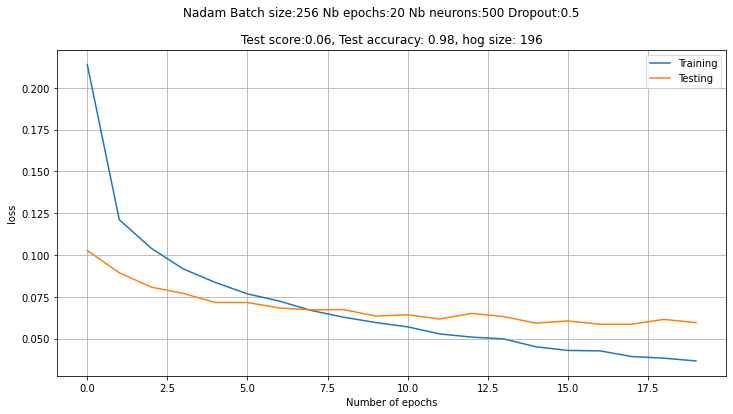

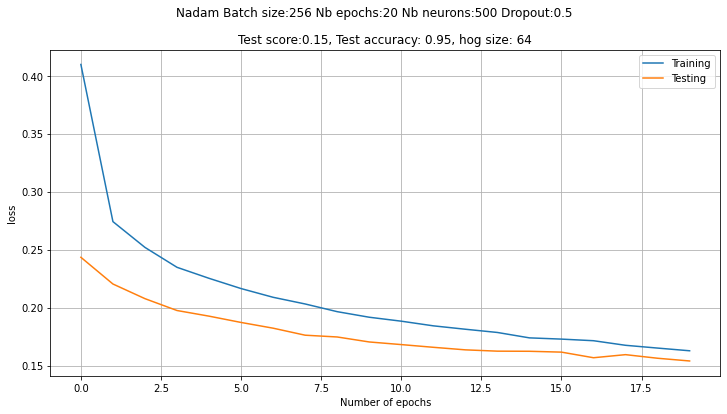

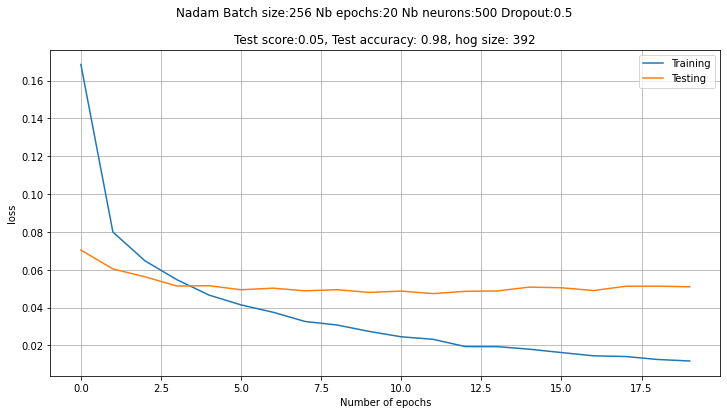

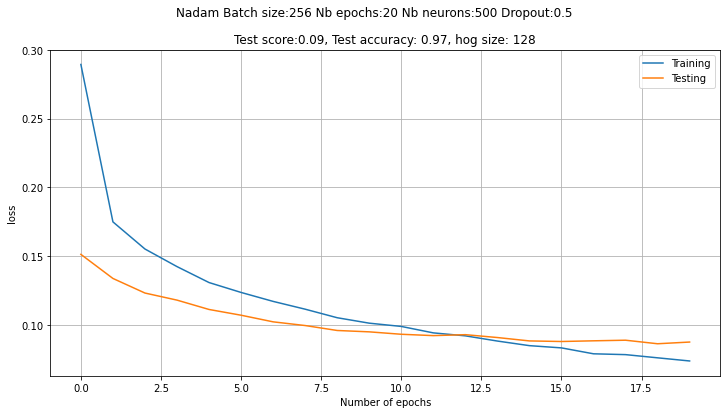

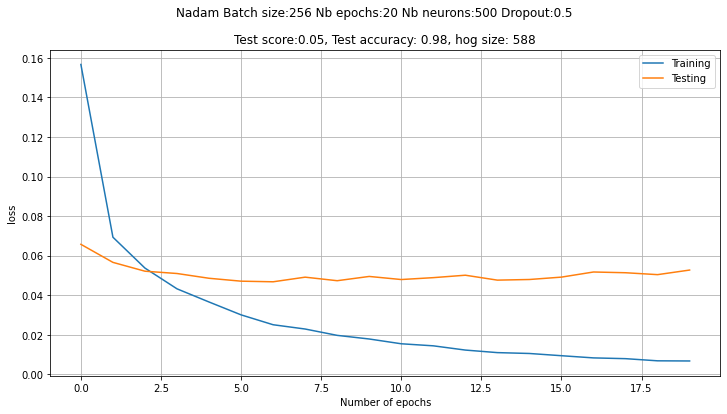

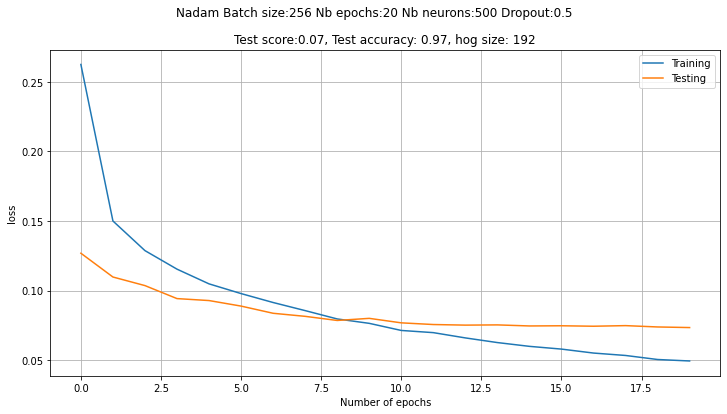

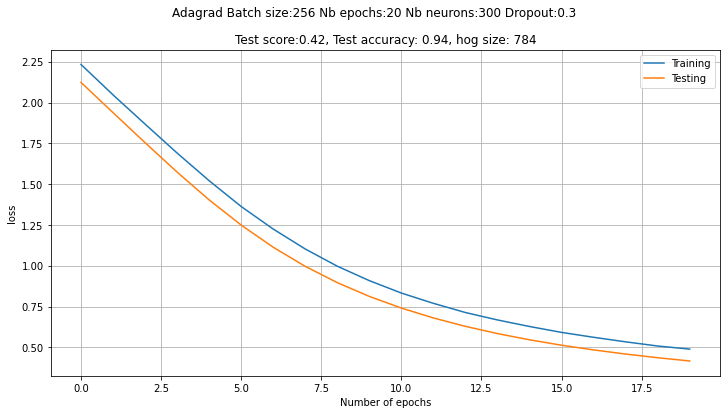

In [102]:
test_hypers([100, 300, 500], [-1, 0.3, 0.5], [64, 128, 256], [Adamax(), Adagrad(), Adam(), Nadam()], ['Adamax', 'Adagrad', 'Adam','Nadam'], [10,20])

In [93]:
def test_hypers(neurons, drops, batch_sizes, optims, optimNames, n_epoch, h_sizes):
    
    for h_s in h_sizes:
        for n_neurons in neurons:
            for drop in drops:
                for b_size in batch_sizes:
                    for i_o, optim in enumerate(optims):
                        for e in n_epoch:
                            clear_session()
                            model = Sequential()
                            model.add(Dense(n_neurons, input_shape=(h_s,), activation='relu'))
                            if drop > 0:
                                model.add(Dropout(drop))
                                model.add(Dense(n_classes, activation='softmax'))
                                model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                                history = model.fit(X_train_hog, Y_train,
                                                       batch_size=b_size, epochs=e,
                                                       verbose=1, validation_data=(X_test_hog, Y_test))
                                score = model.evaluate(X_test_hog, Y_test, verbose=0)
                                plot_graph(history, optimNames[i_o], b_size, e, n_neurons, drop, score[0], score[1],h_s)
                                print('Test score:', score[0])
                                print('Test accuracy:', score[1])

In [94]:
print(hog_sizes)

[196, 64, 392, 128, 588, 192, 784, 256]


In [ ]:
'''model = Sequential()
model.add(Dense(200, input_shape=(hog_size,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()'''

Define some constants and train the MLP

In [ ]:
'''batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train_hog, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test_hog, Y_test))'''

Show the performance of the model

In [ ]:
'''pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test_hog, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])'''

Confusion matrix

In [ ]:
'''pred = model.predict(X_test_hog)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)'''